In [9]:
# pip install minisom

In [10]:
#  pip install keras

In [11]:
#  pip install tensorflow

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif,  RFE
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

from minisom import MiniSom
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.cluster import KMeans
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


In [13]:
# a function to plot confusion matrices
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [81]:
def calculate_tp_tn_fp_fn(y_true, y_pred,confusion_mat):
    confusion_mat = confusion_matrix(y_true, y_pred)
    TP = confusion_mat[1, 1]
    TN = confusion_mat[0, 0]
    FP = confusion_mat[0, 1]
    FN = confusion_mat[1, 0]
    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)

# Data preprocessing and EDA 

In [14]:
#Reading Training set
train=pd.read_csv("Downloads/training_dataset.csv")
test=pd.read_csv("Downloads/test_dataset.csv")
val = pd.read_csv("Downloads/validation_dataset.csv")

In [15]:
# Removing 'Id' column 
train.drop(columns='Id', inplace=True)
test.drop(columns='Id', inplace=True)
val.drop(columns='Id', inplace=True)

In [16]:
train

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2976      85     23                                95   
1          3104     233     12                               150   
2          3385     160      7                               937   
3          3191      41     14                               210   
4          2821     297      4                                85   
...         ...     ...    ...                               ...   
8281       3294     328     13                               624   
8282       3390      24      6                               216   
8283       3350     100     18                               175   
8284       3727       5     17                               984   
8285       3379     180      0                               175   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 72                             2436   
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
8281                             192                             3506   
8282                              13                             3332   
8283                             -26                             2121   
8284                             318                             4934   
8285                              37                             2672   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0               246             193             64   
1               200             251            186   
2               228             242            147   
3               221             208            119   
4               208             238            169   
...             ...             ...            ...   
8281            188             224            175   
8282            217             226            146   
8283            247             212             88   
8284            195             204            143   
8285            219             238            157   

      Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                    836  ...            0            0   
1                                   1129  ...            0            0   
2                                    752  ...            0            0   
3                                    865  ...            1            0   
4                                    242  ...            0            0   
...                                  ...  ...          ...          ...   
8281                                3583  ...            0            0   
8282                                2226  ...            0            0   
8283                                3322  ...            0            0   
8284                                3092  ...            0            0   
8285                                2388  ...            0            0   

      Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8281            0            0            0            0            0   
8282            0            0            0            1            0   
8283            0            0            0            0            1   
8284            0            0  

In [17]:
test

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2823     104     20                               573   
1          2453     157      7                               474   
2          3156     110      6                               162   
3          2471     186     16                               175   
4          2292     177     29                               443   
...         ...     ...    ...                               ...   
1520       2850      99     23                                67   
1521       2562      58     22                                85   
1522       2784      88     12                               180   
1523       2343     184     14                               361   
1524       2104     154      9                                30   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                191                             2608   
1                                183                              806   
2                                 24                             1101   
3                                 67                              972   
4                                152                             1315   
...                              ...                              ...   
1520                              18                             4909   
1521                              26                              331   
1522                              -2                              510   
1523                             232                              912   
1524                              -1                             1290   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0               249             210             80   
1               228             241            146   
2               230             234            138   
3               221             250            157   
4               219             242            134   
...             ...             ...            ...   
1520            250             201             65   
1521            230             187             79   
1522            238             220            112   
1523            223             249            156   
1524            231             241            141   

      Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                   1940  ...            0            0   
1                                    920  ...            0            0   
2                                   1758  ...            0            0   
3                                   1332  ...            0            0   
4                                    797  ...            0            0   
...                                  ...  ...          ...          ...   
1520                                 124  ...            0            0   
1521                                1624  ...            0            0   
1522                                 295  ...            0            0   
1523                                 421  ...            0            0   
1524                                 977  ...            0            0   

      Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1520            0            0            0            0            0   
1521            0            0            0            0            0   
1522            0            0            0            0            0   
1523            0            0  

In [18]:
val

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2432     147     16                                90   
1          2653     114     14                               175   
2          3542     315     31                               255   
3          3191     286     20                                30   
4          2160      64     37                               190   
...         ...     ...    ...                               ...   
1493       2062      75     12                                 0   
1494       2926      67     12                               324   
1495       2595      98     19                               190   
1496       2820     257     15                               127   
1497       3079     130     22                               297   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  2                              484   
1                                 38                             2278   
2                                130                             3218   
3                                 12                             4965   
4                                 96                              240   
...                              ...                              ...   
1493                               0                              420   
1494                              45                             3055   
1495                               0                             1883   
1496                              23                             2496   
1497                              81                             1781   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0               240             236            120   
1               244             225            107   
2               124             198            206   
3               162             235            212   
4               225             140             15   
...             ...             ...            ...   
1493            234             217            113   
1494            232             217            116   
1495            248             209             81   
1496            183             248            202   
1497            250             221             87   

      Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                   1385  ...            0            0   
1                                   2345  ...            0            0   
2                                   1448  ...            0            0   
3                                    781  ...            0            0   
4                                    484  ...            0            0   
...                                  ...  ...          ...          ...   
1493                                 691  ...            0            0   
1494                                2093  ...            0            0   
1495                                2010  ...            0            0   
1496                                 702  ...            0            0   
1497                                2205  ...            0            1   

      Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1493            0            0            0            0            0   
1494            0            0            0            0            0   
1495            0            0            0            0            0   
1496            0            0  

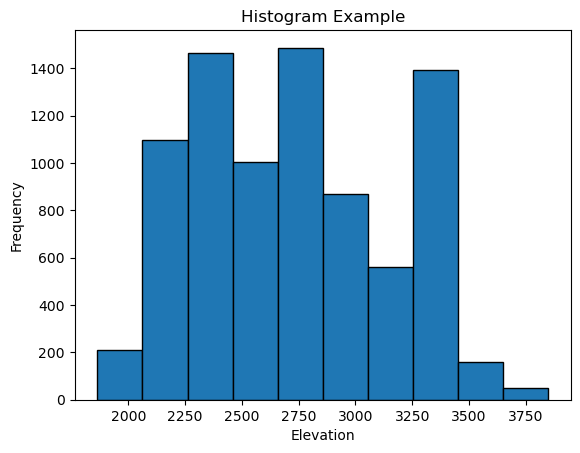

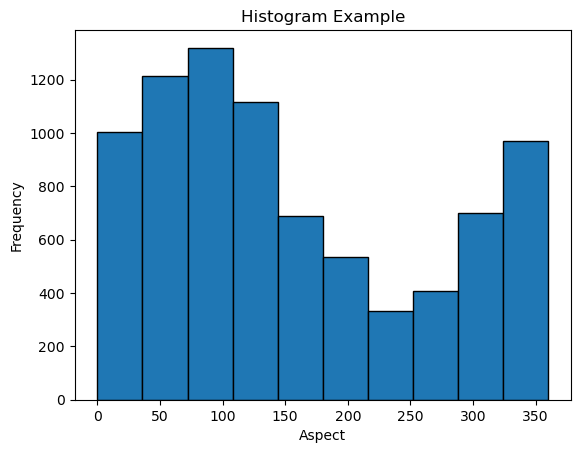

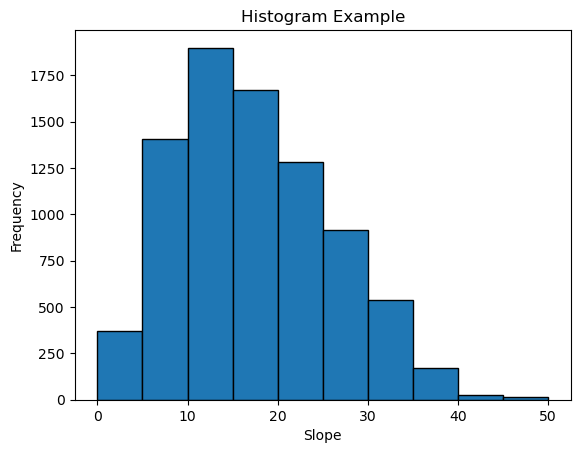

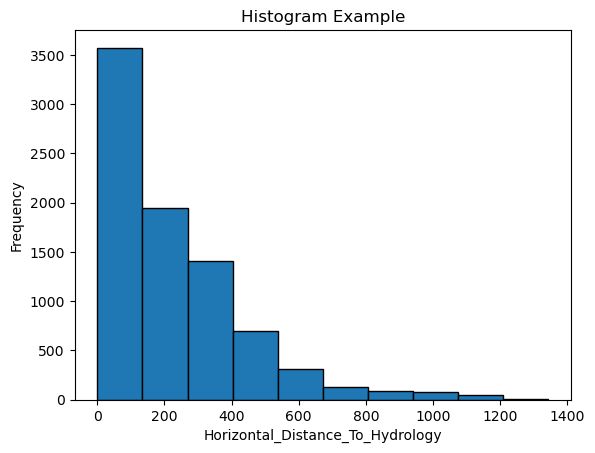

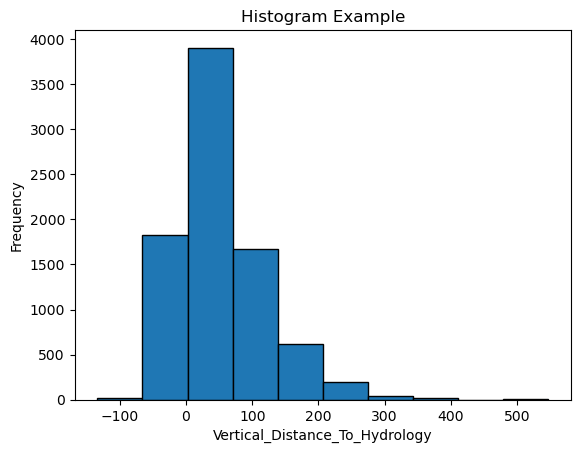

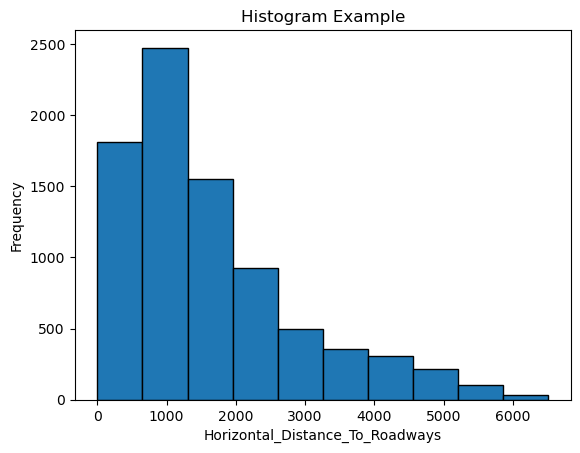

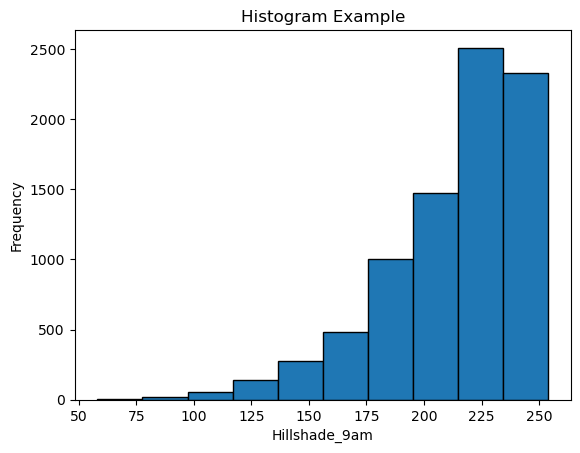

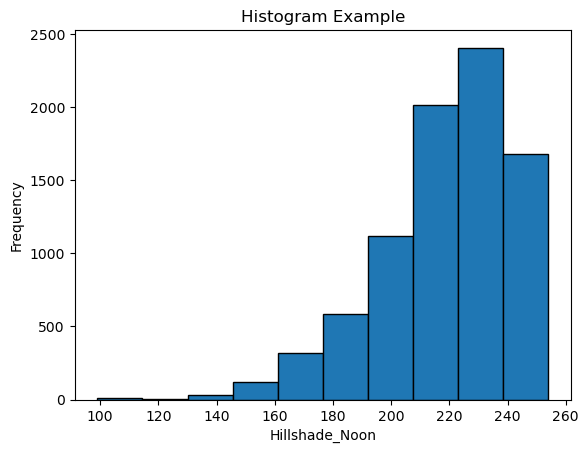

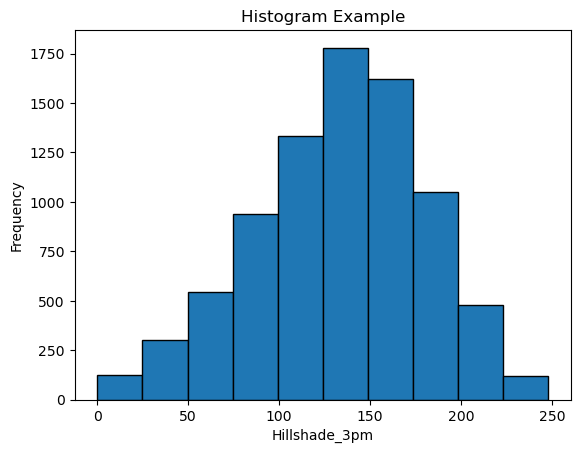

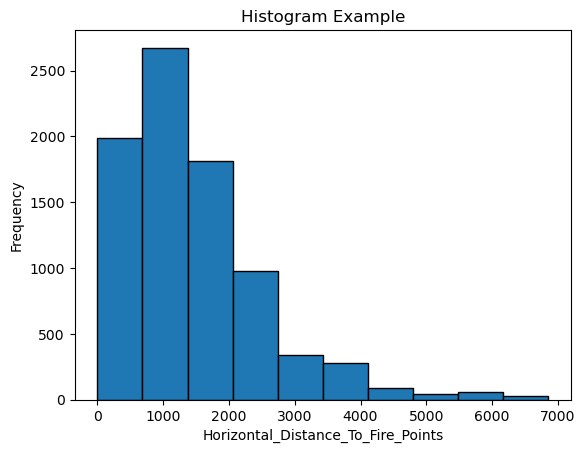

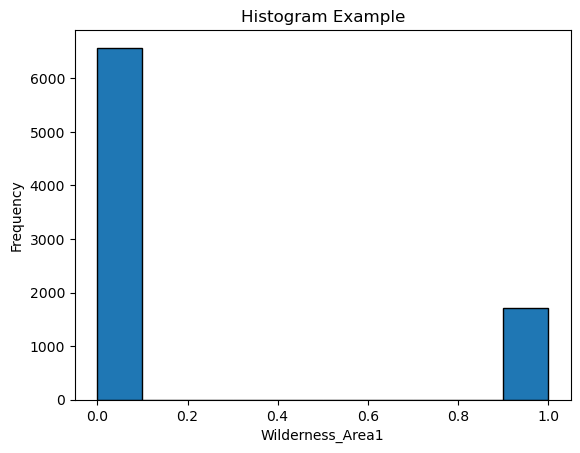

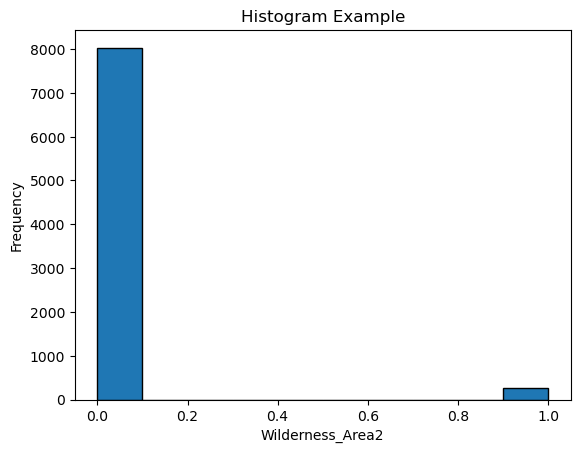

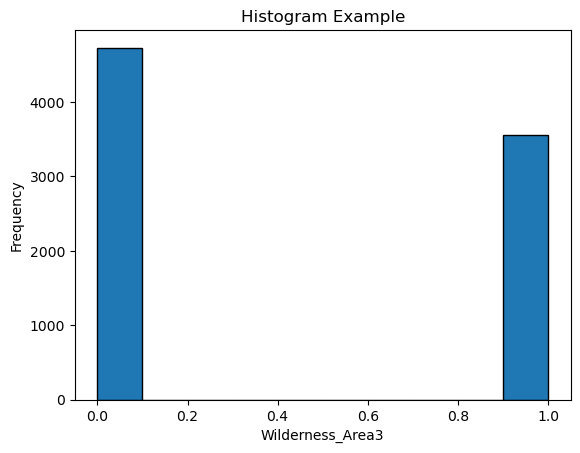

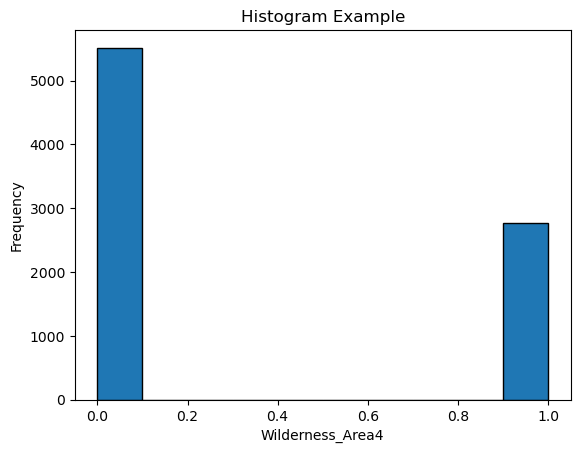

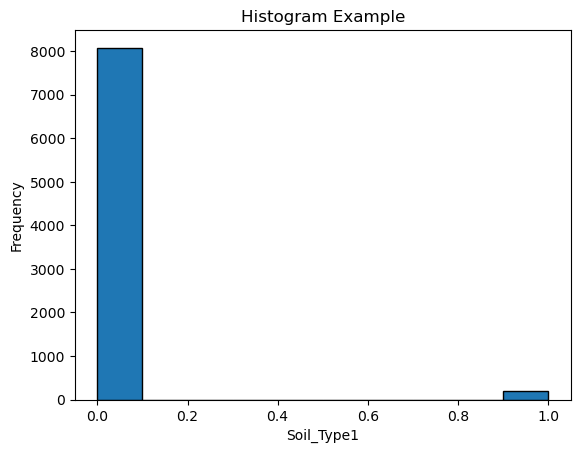

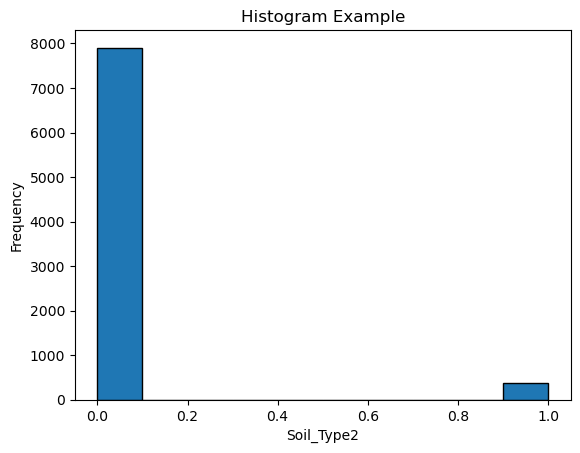

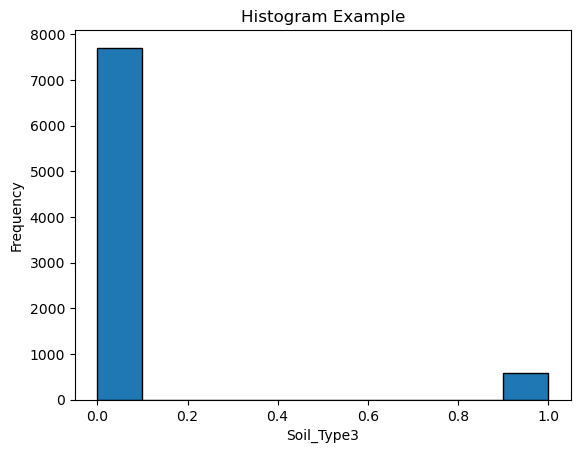

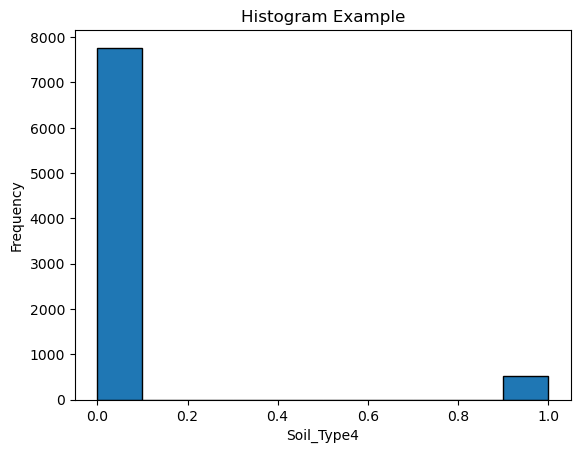

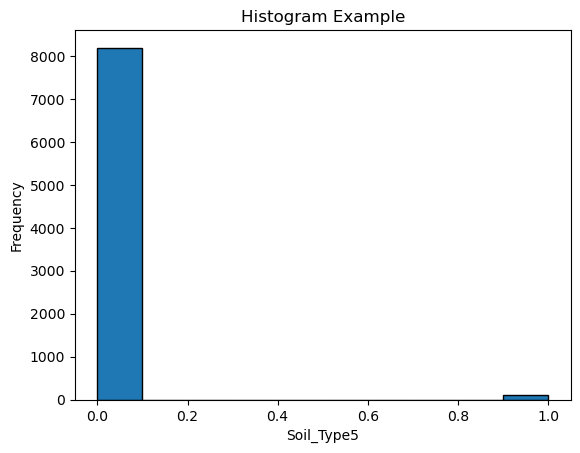

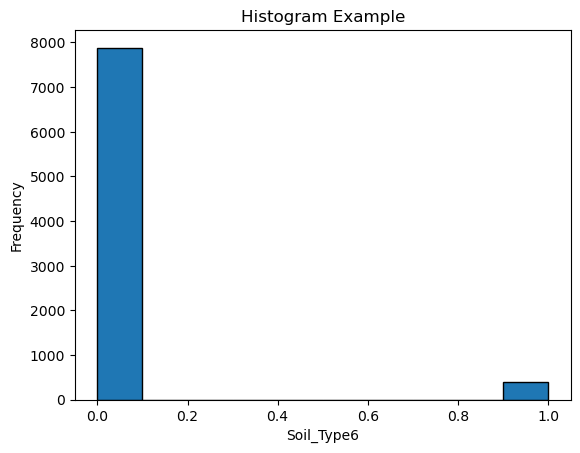

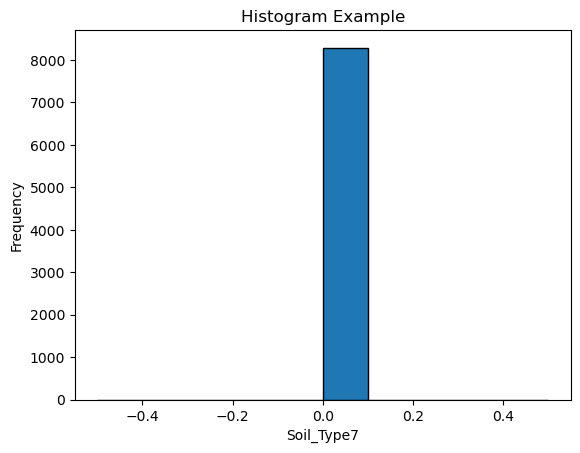

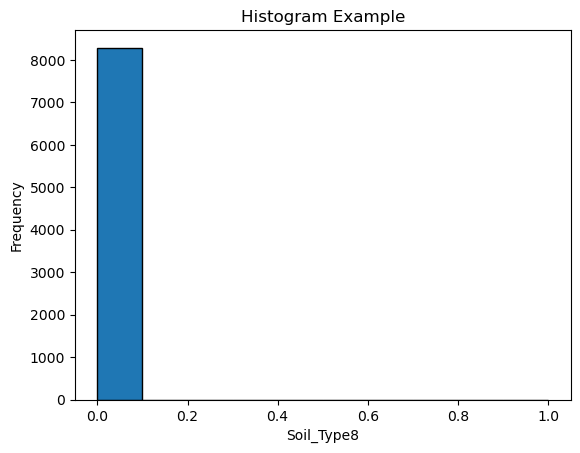

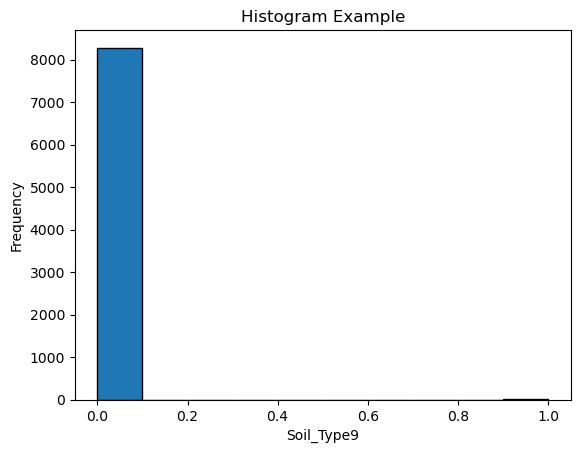

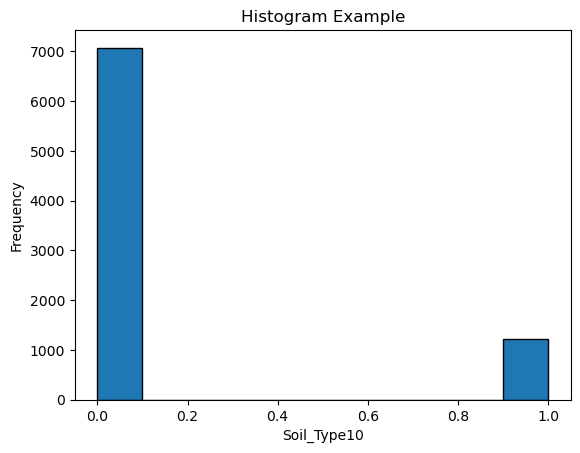

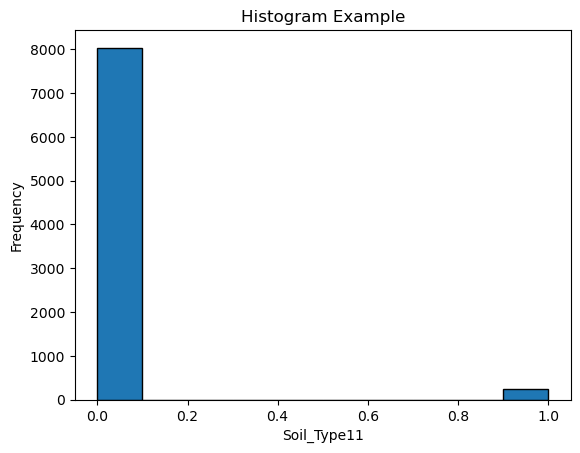

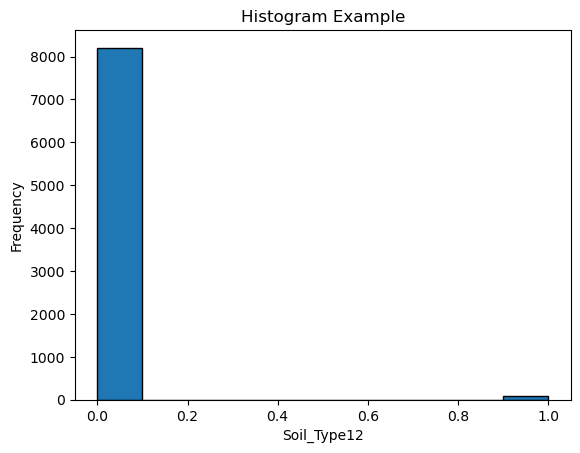

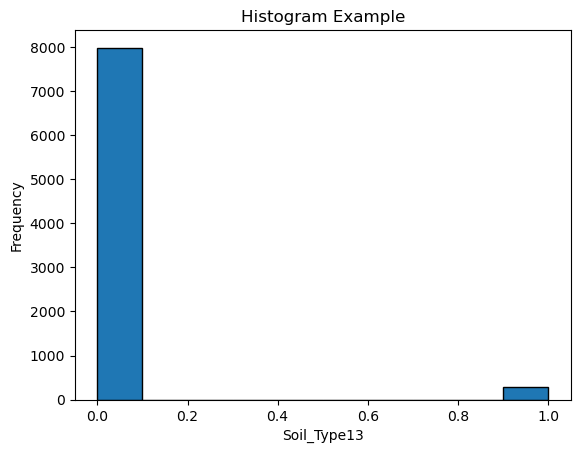

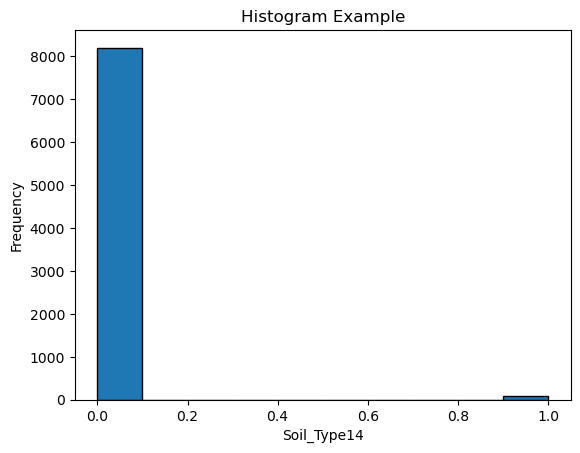

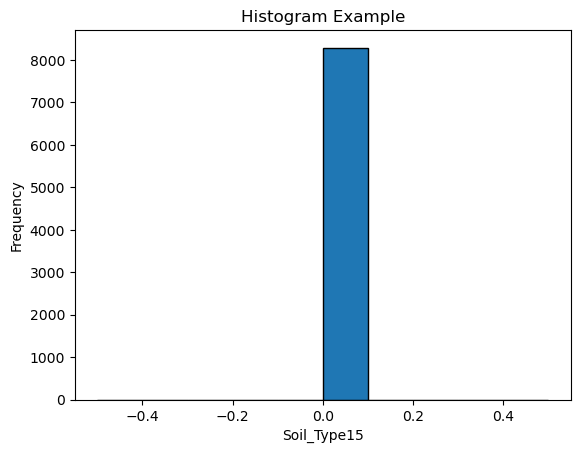

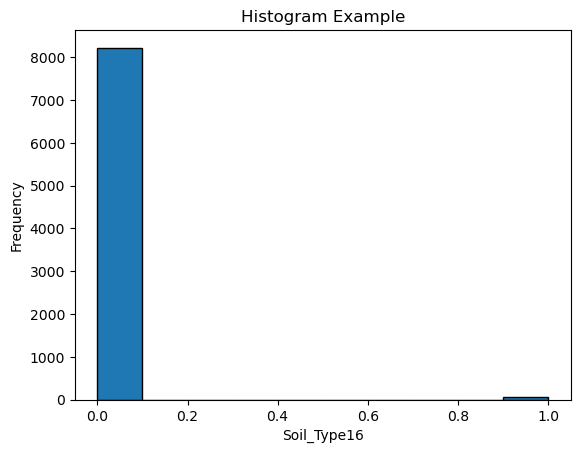

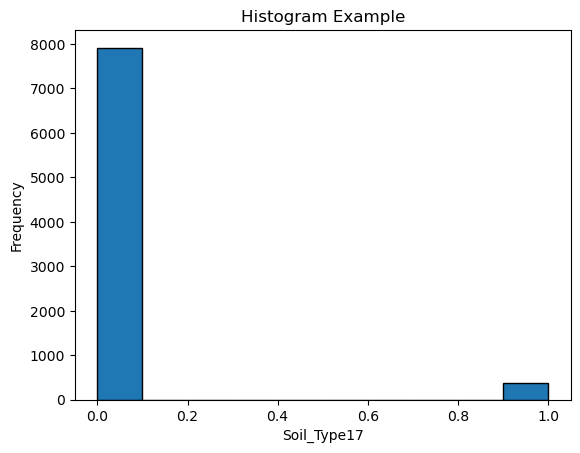

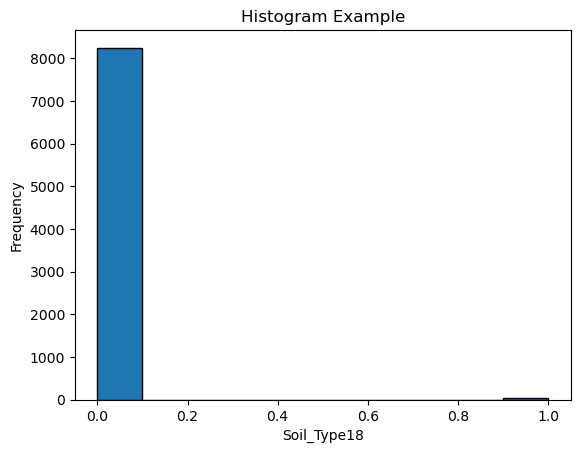

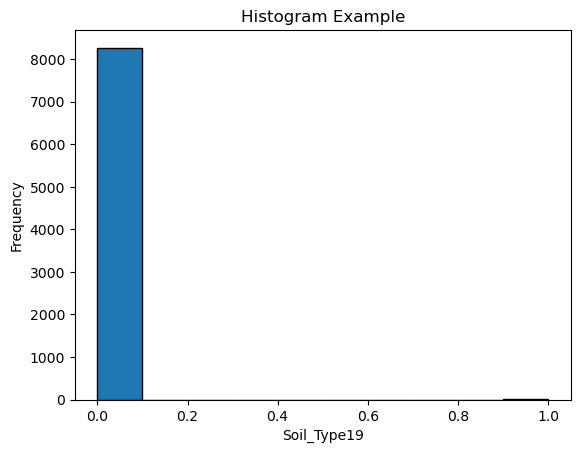

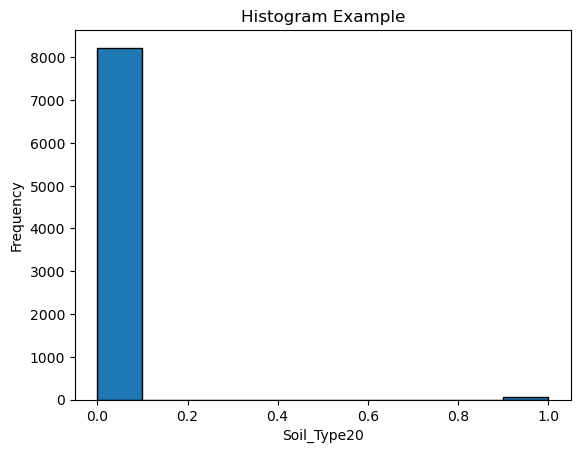

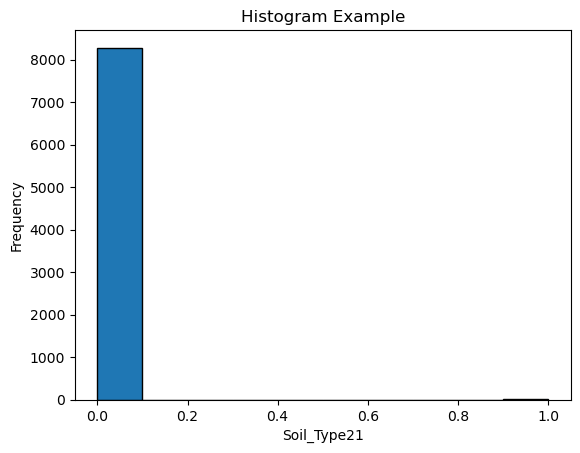

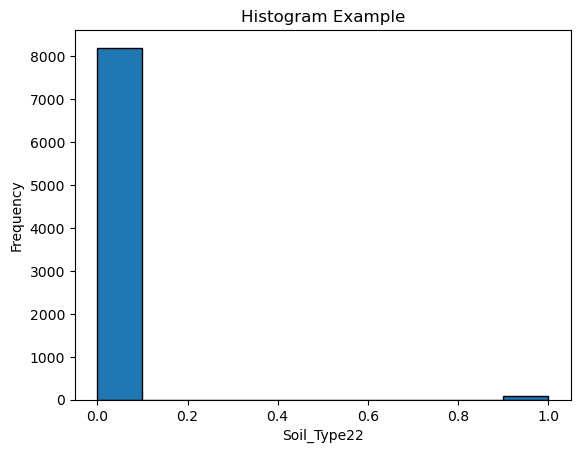

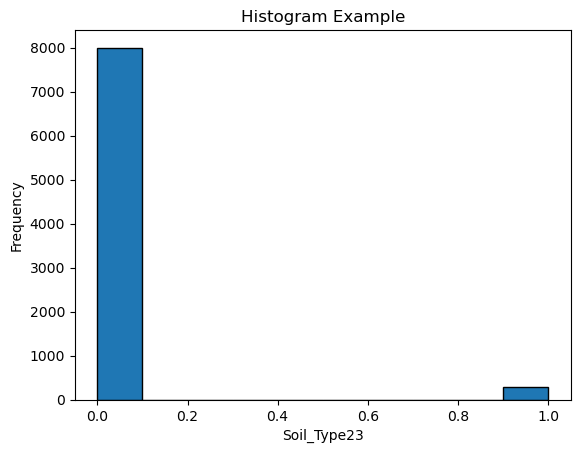

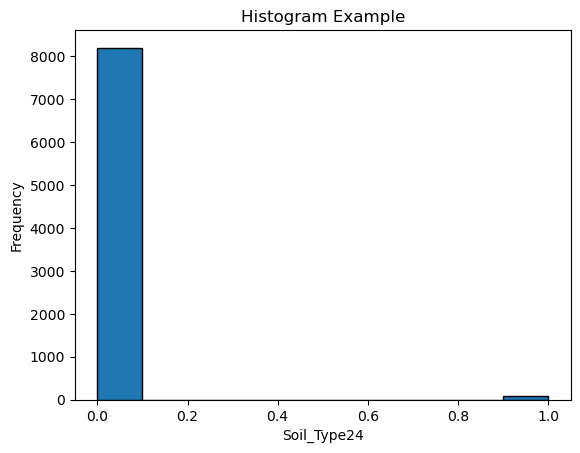

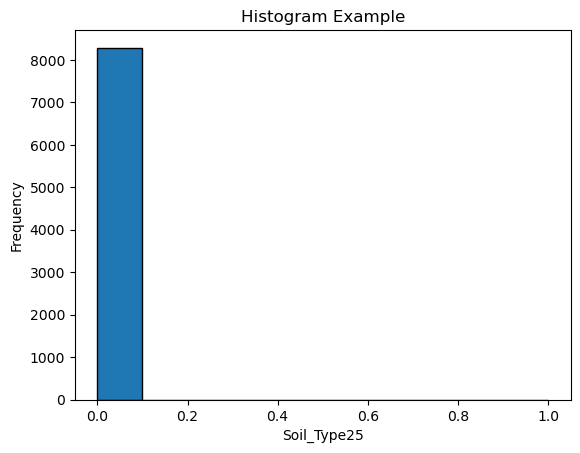

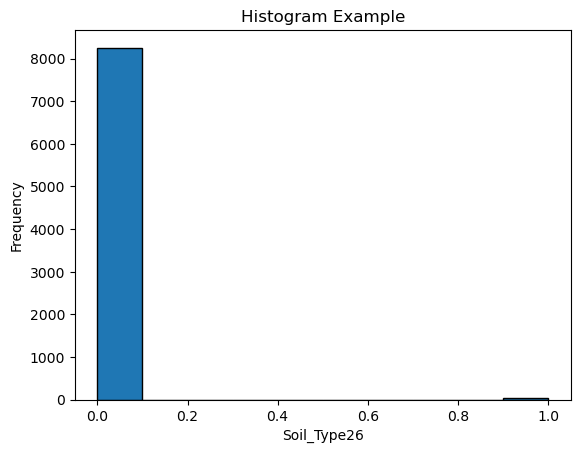

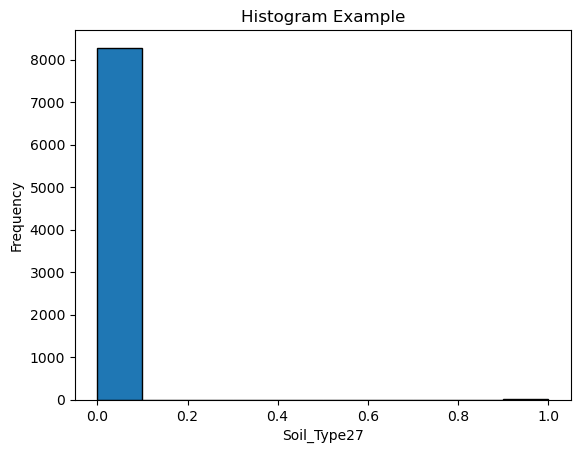

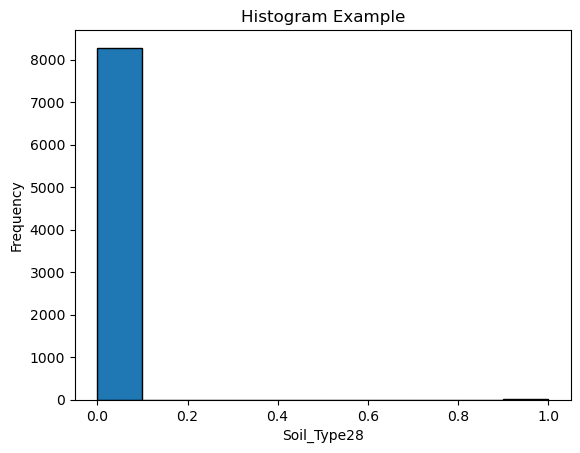

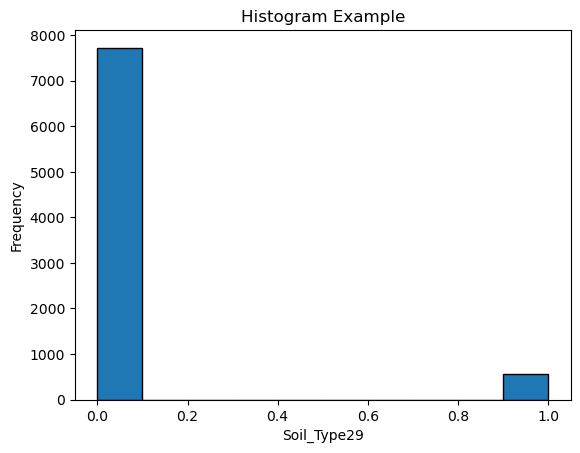

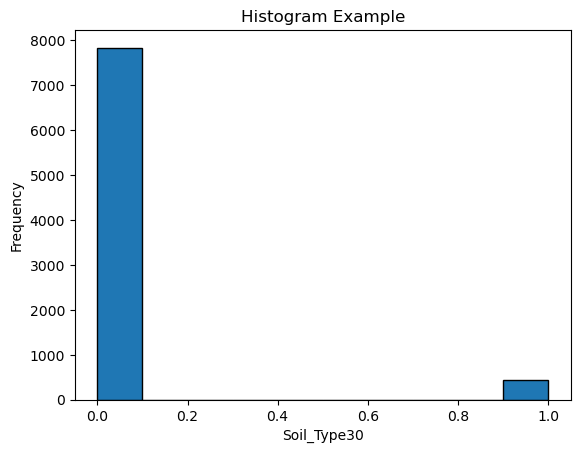

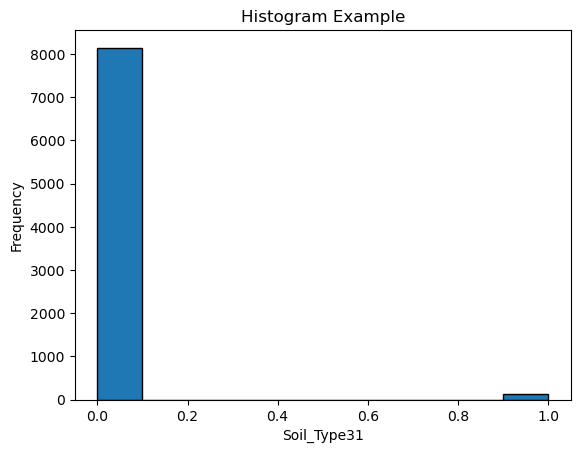

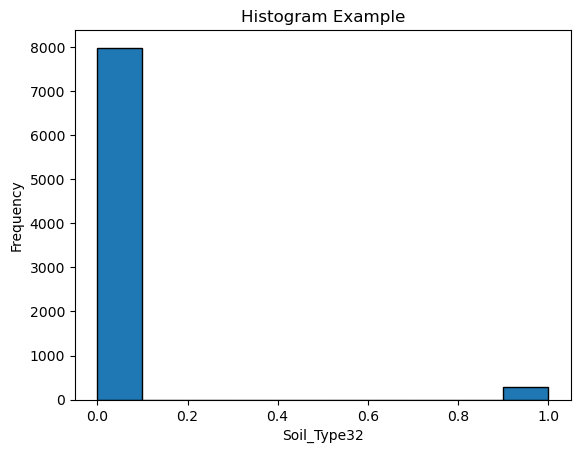

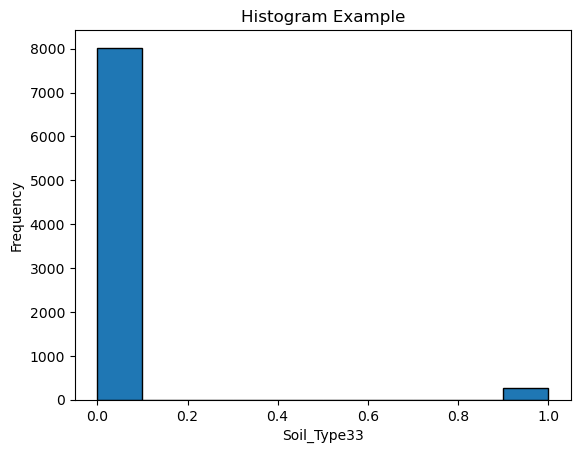

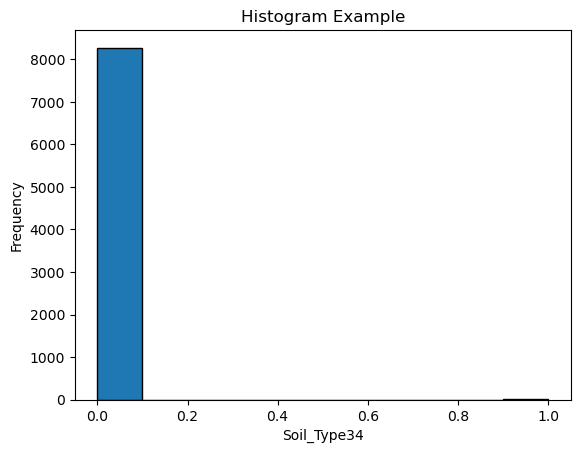

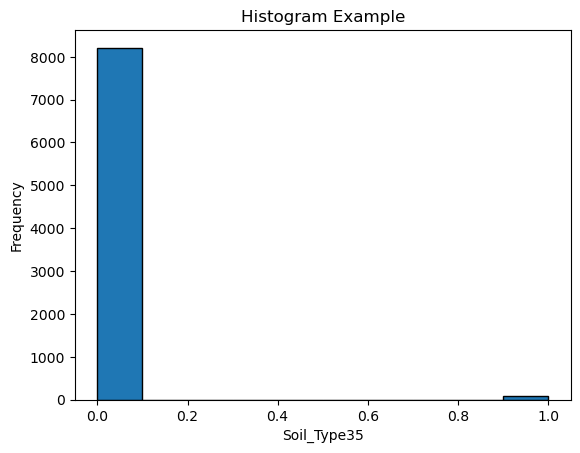

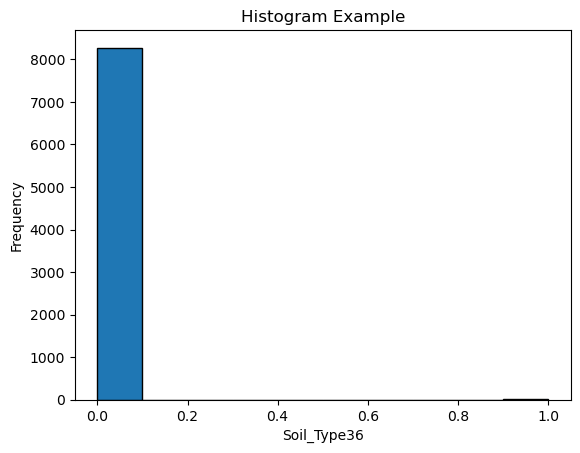

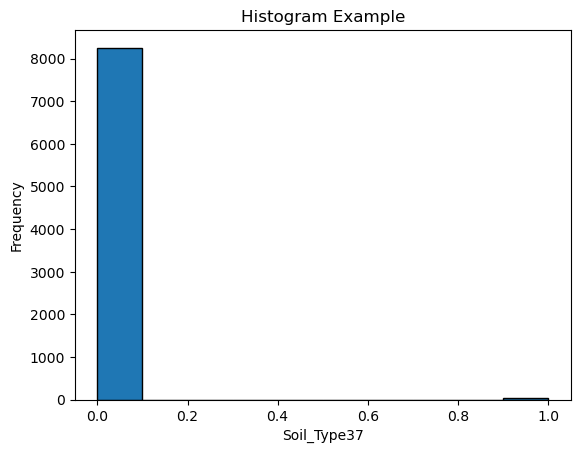

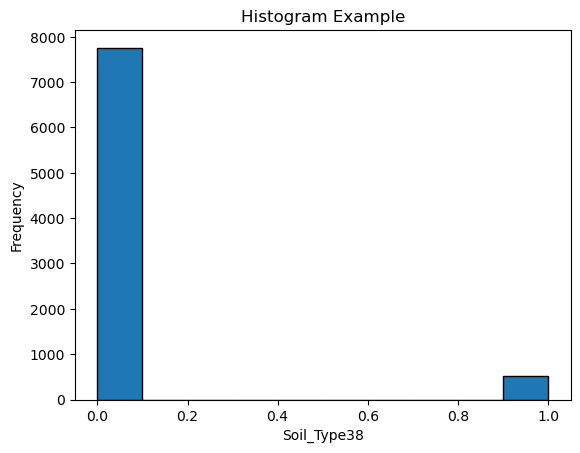

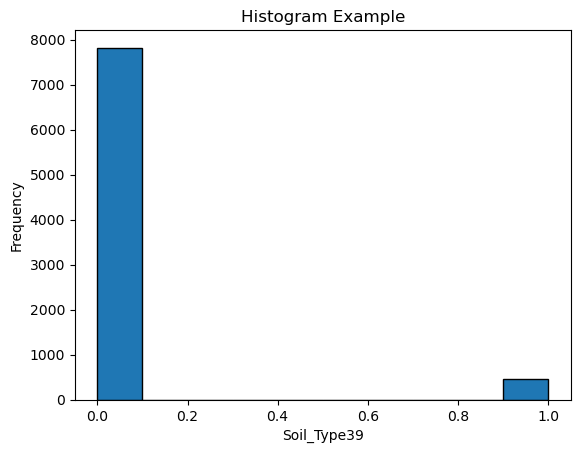

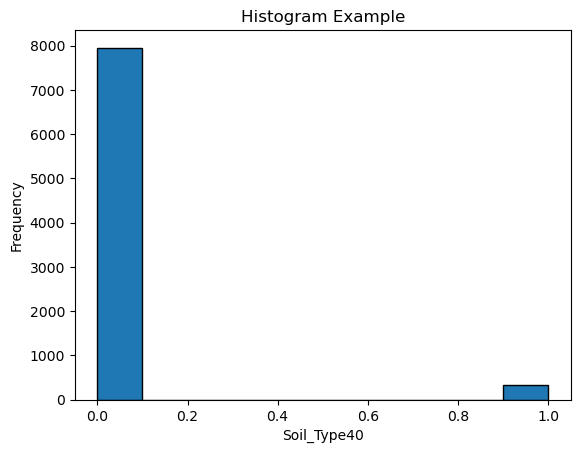

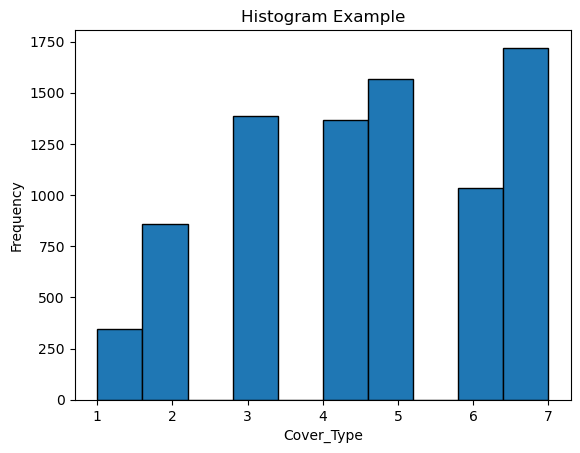

In [19]:
numerical_features = train.select_dtypes(include=[float, int]).columns
for i in numerical_features:
    plt.hist(train[i], bins=10, edgecolor='black')
    # Customize the plot
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Histogram Example')

    # Display the plot
    plt.show()


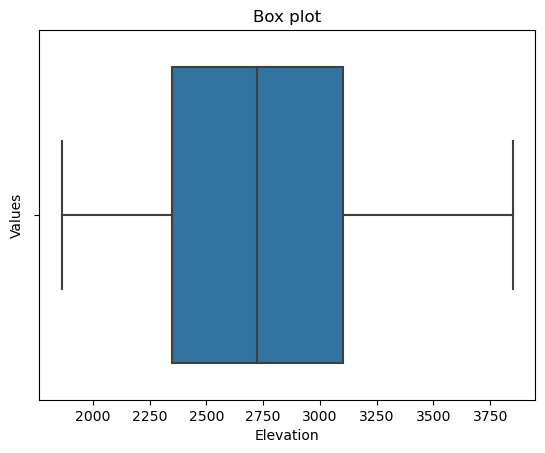

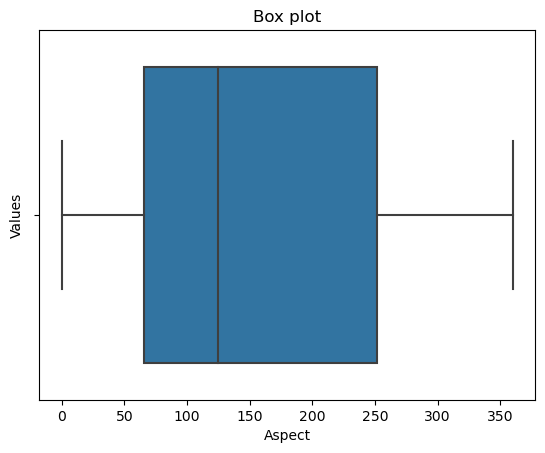

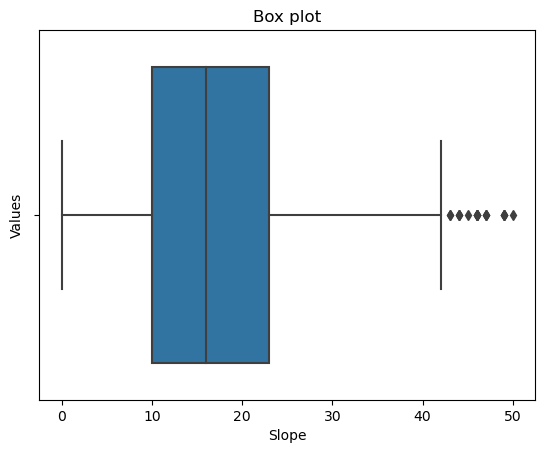

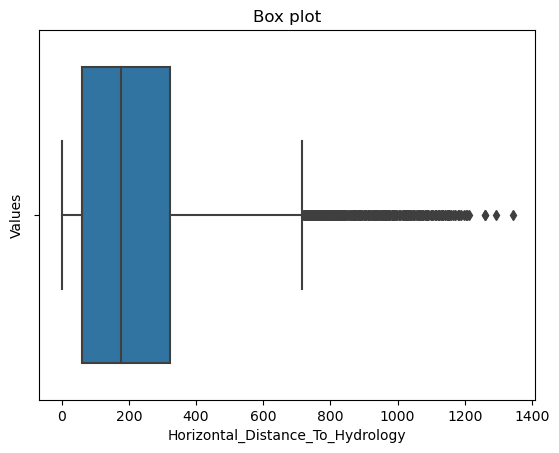

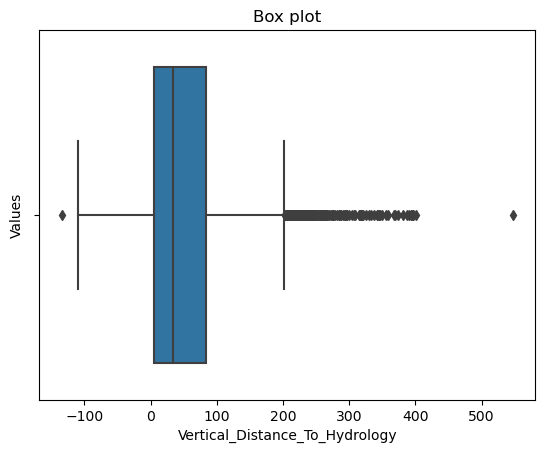

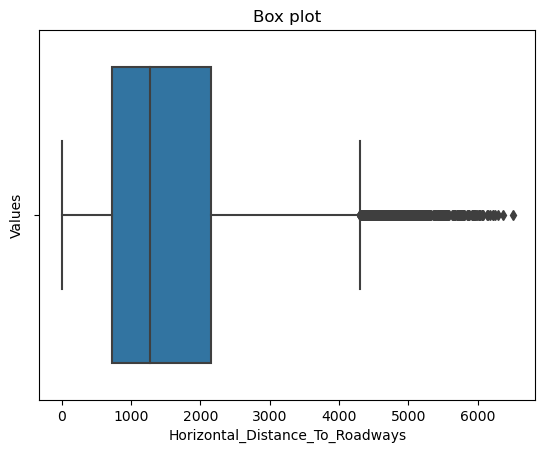

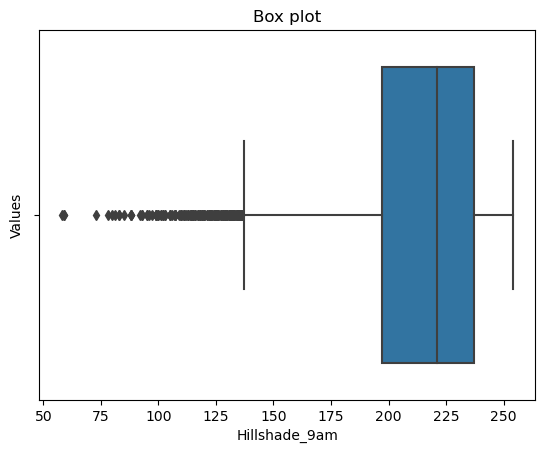

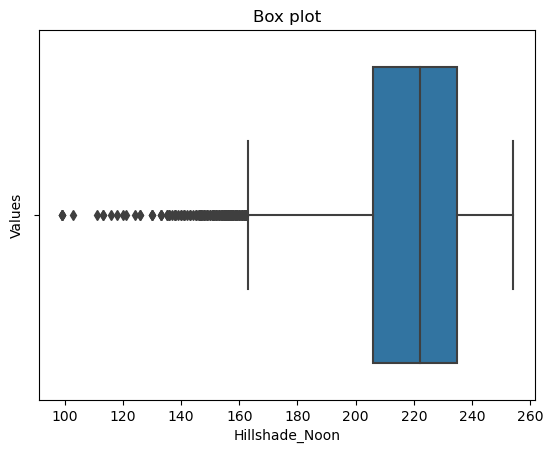

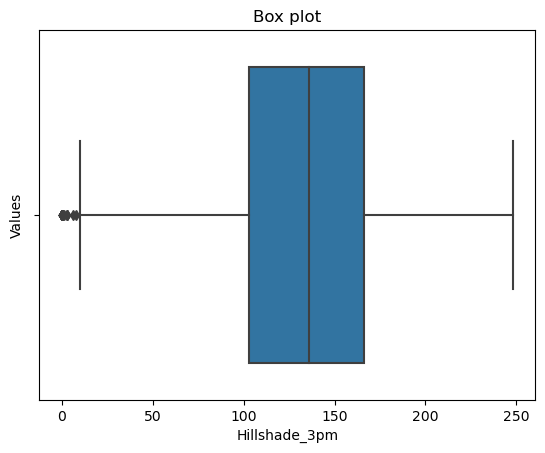

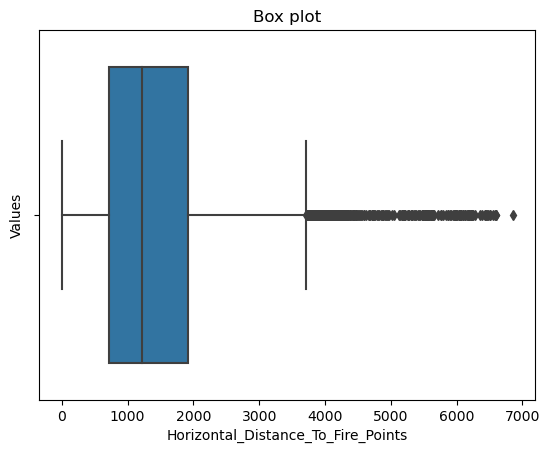

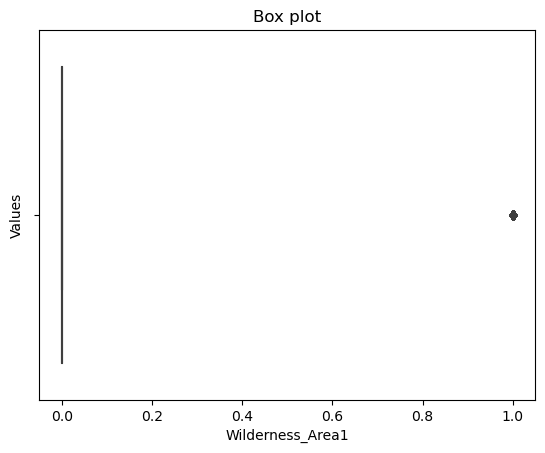

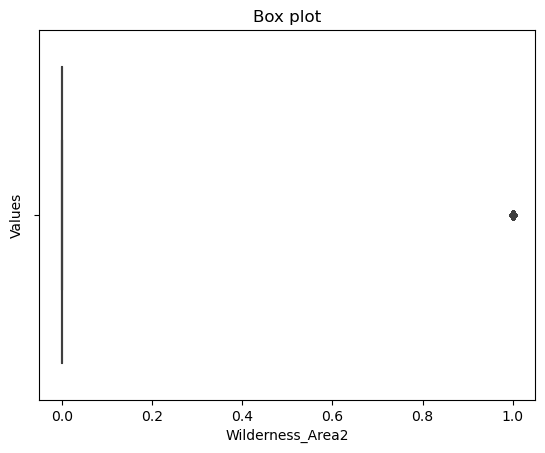

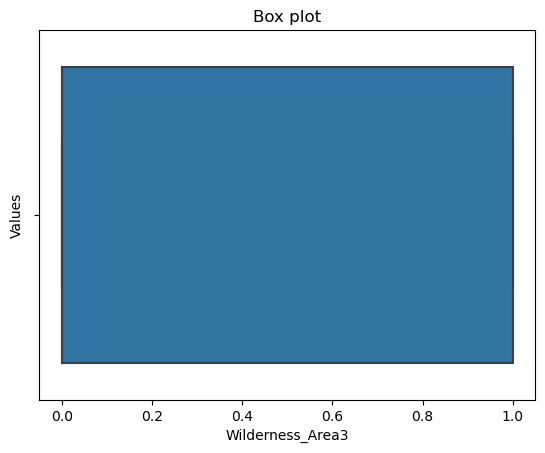

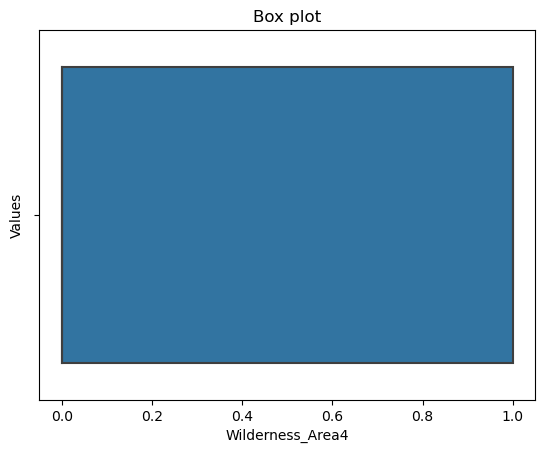

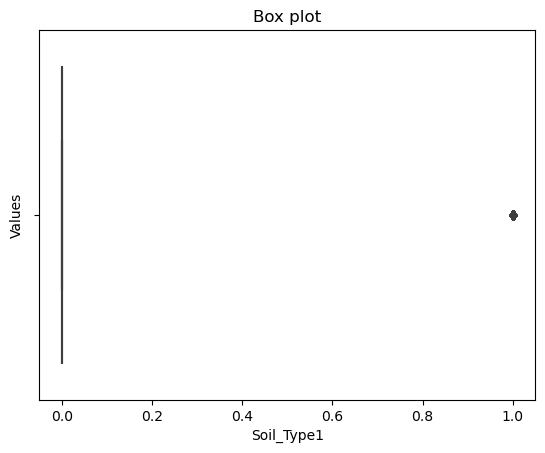

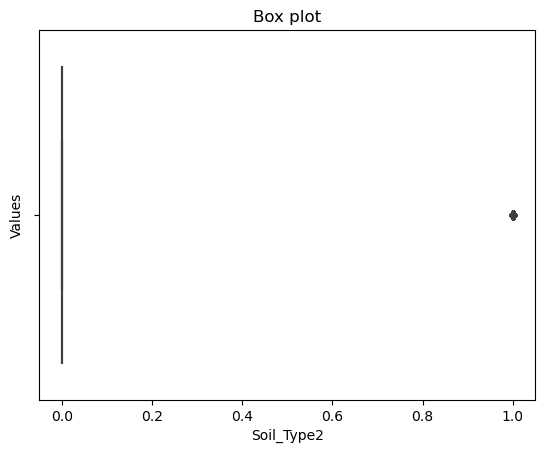

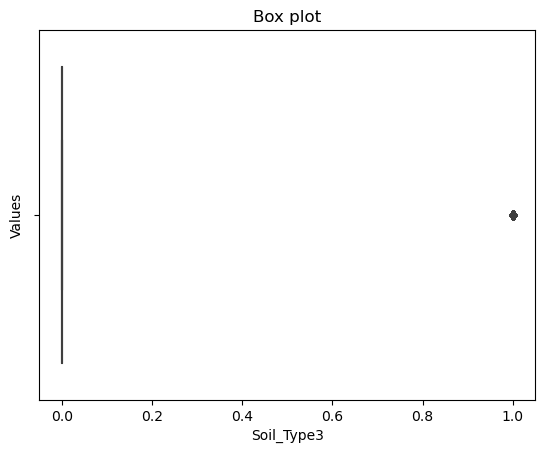

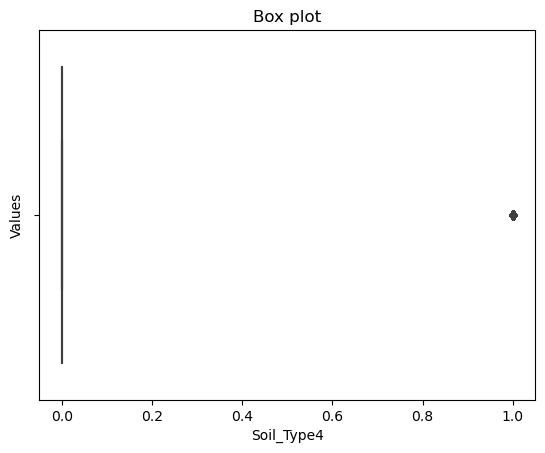

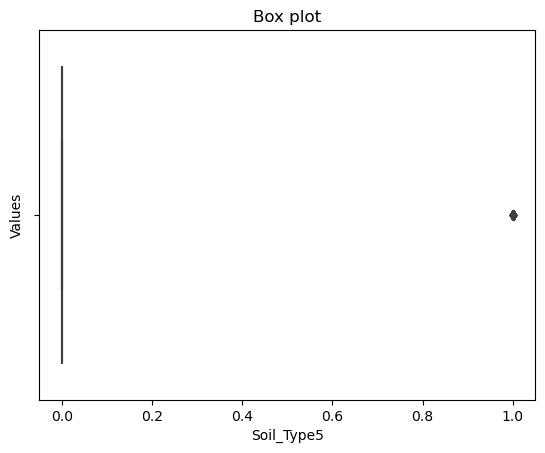

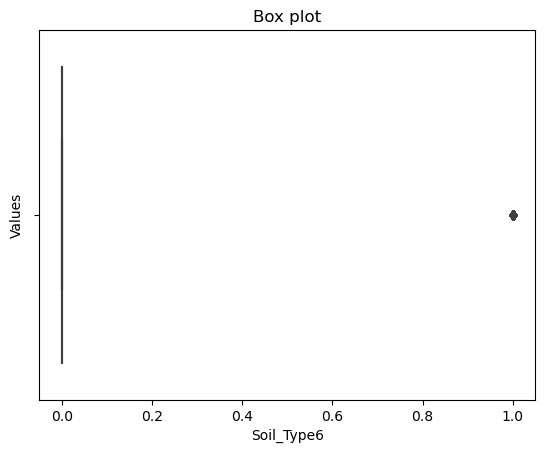

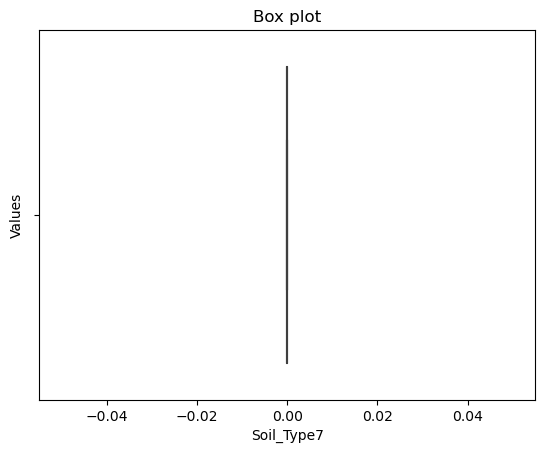

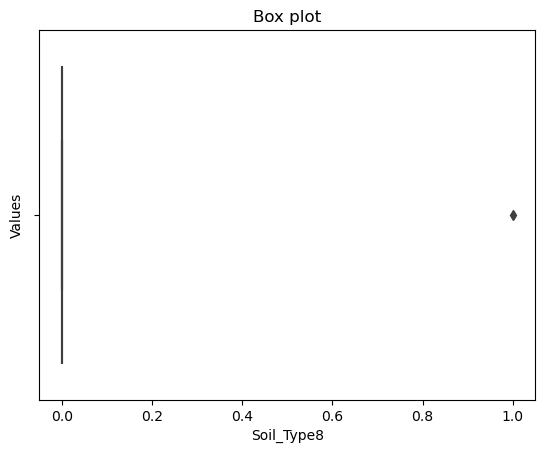

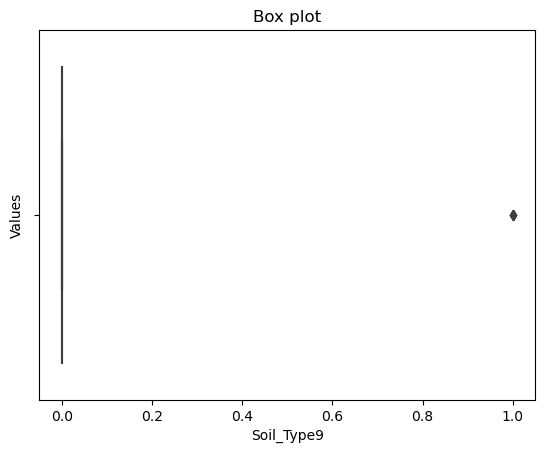

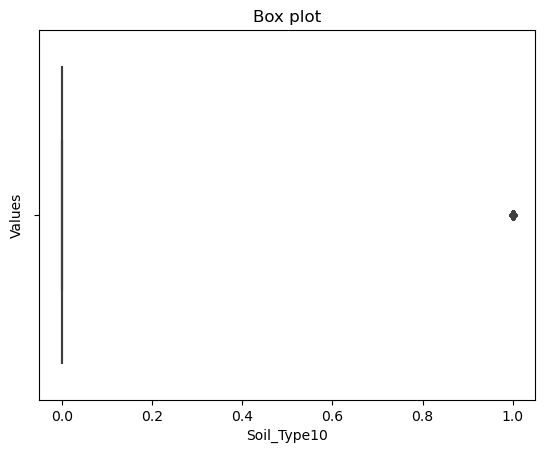

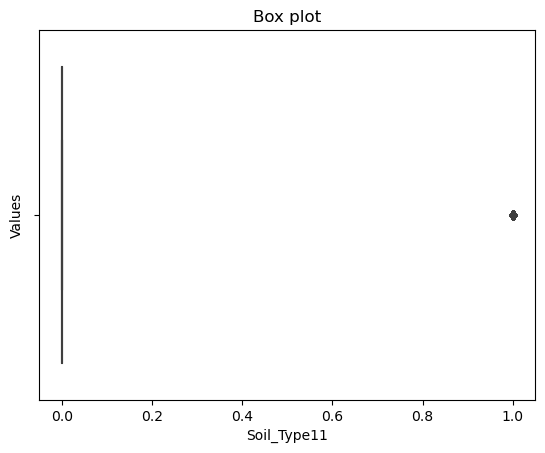

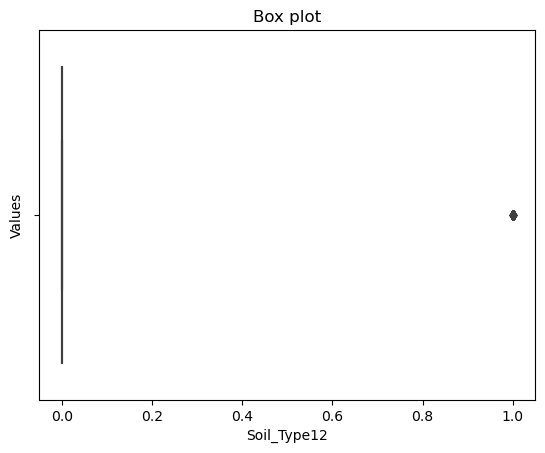

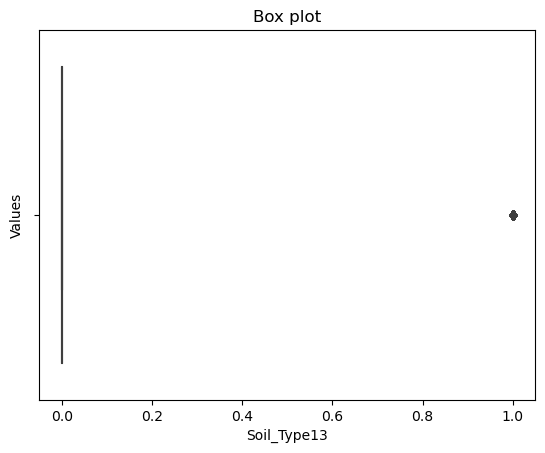

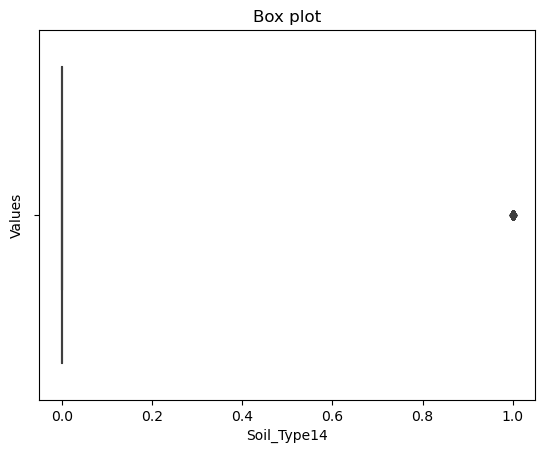

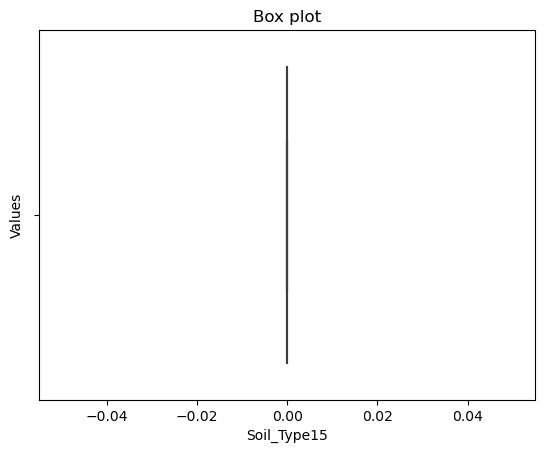

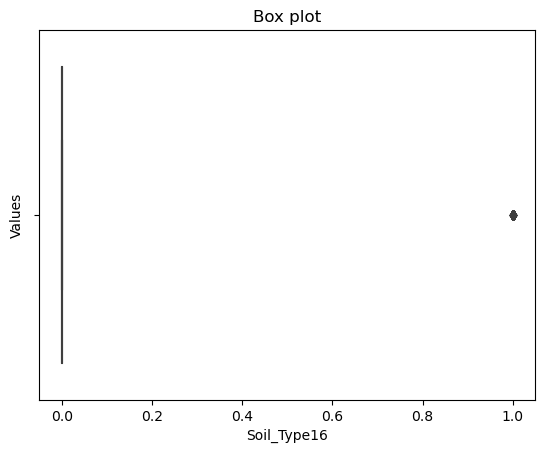

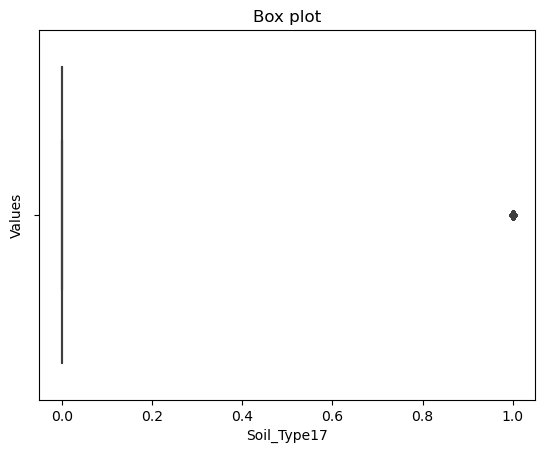

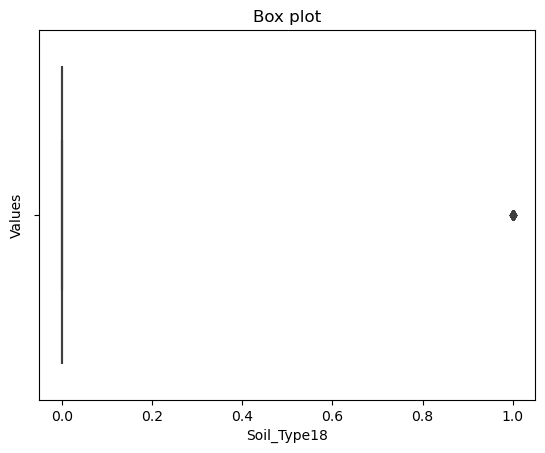

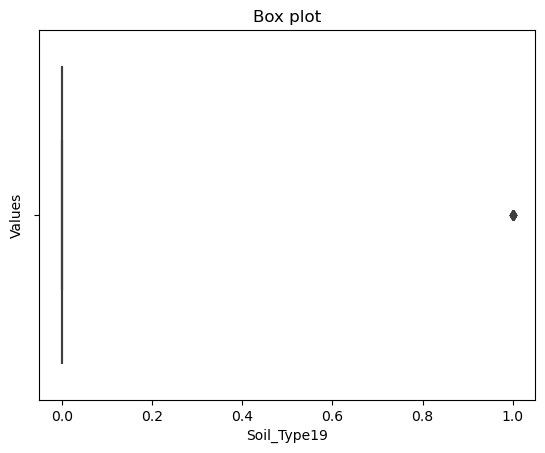

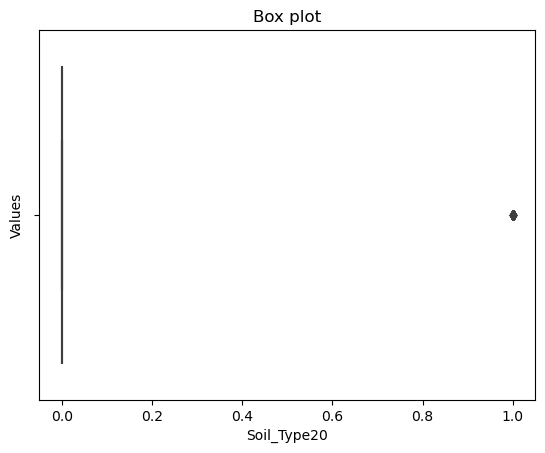

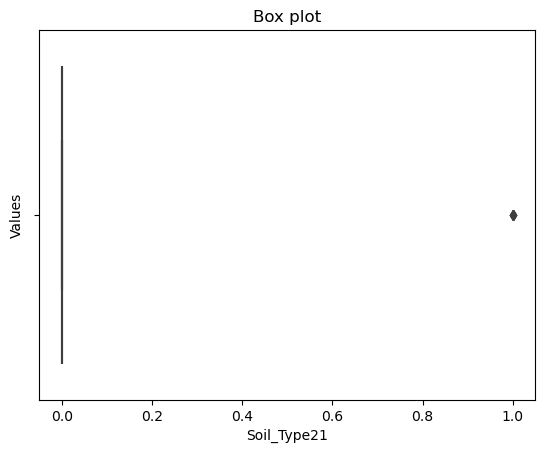

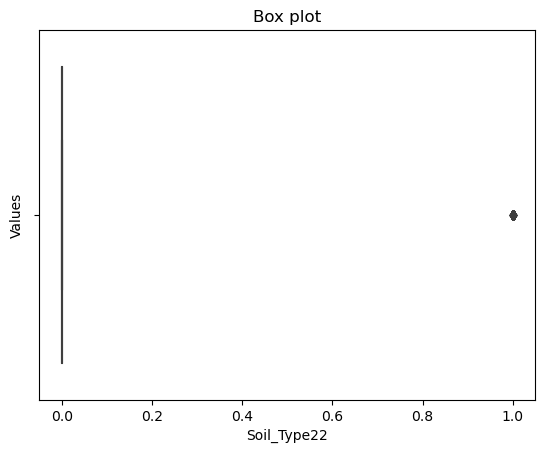

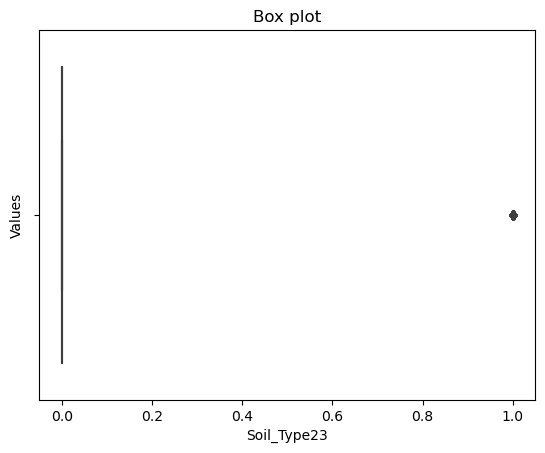

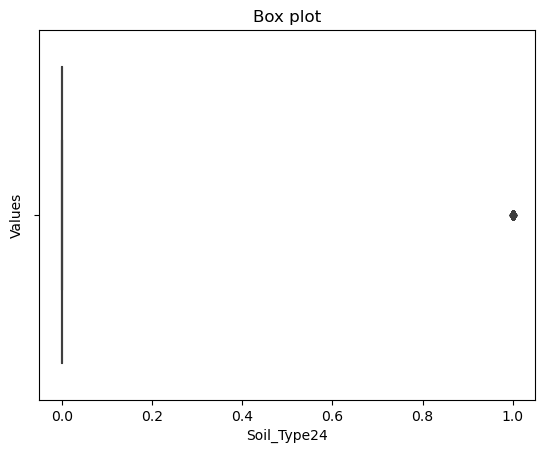

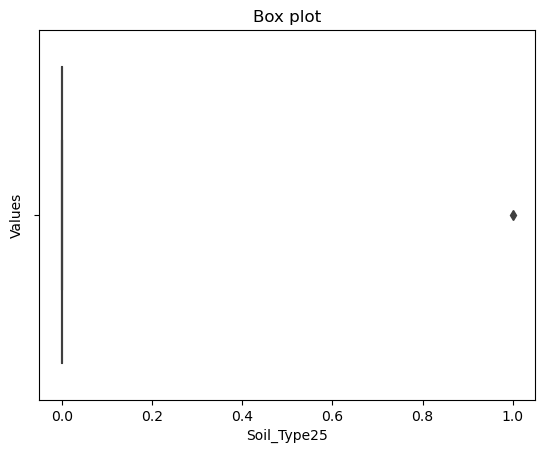

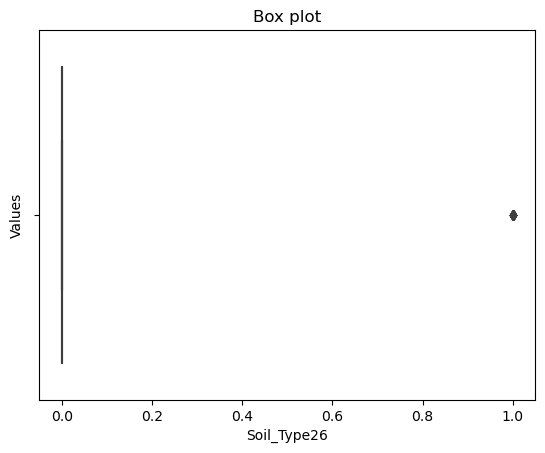

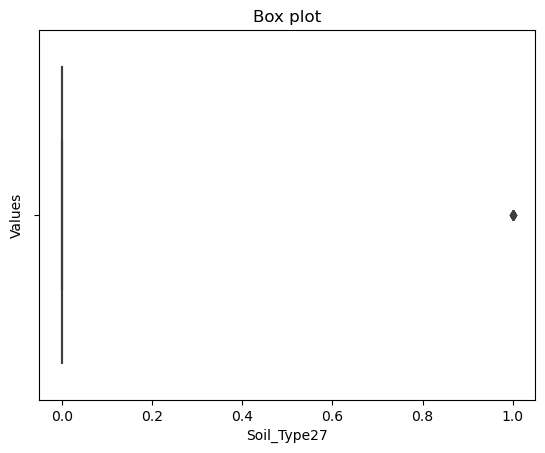

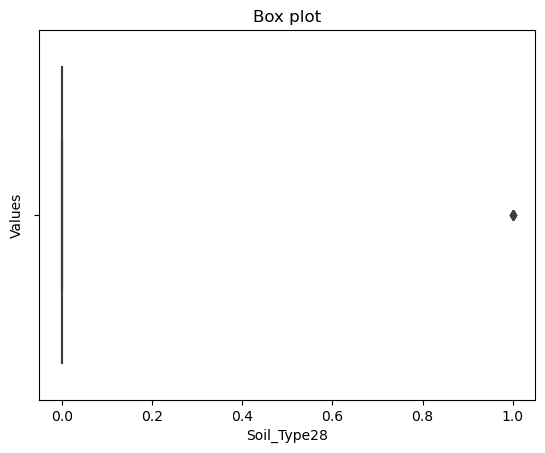

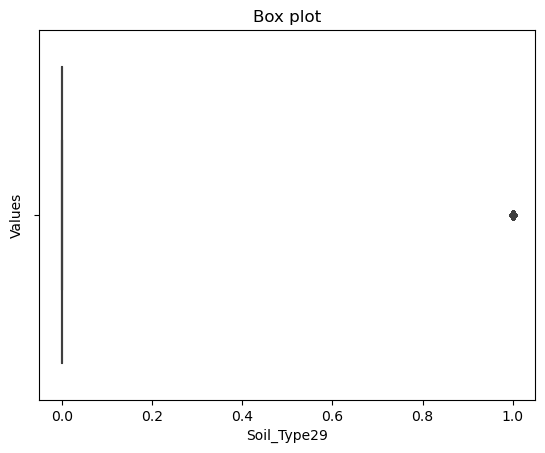

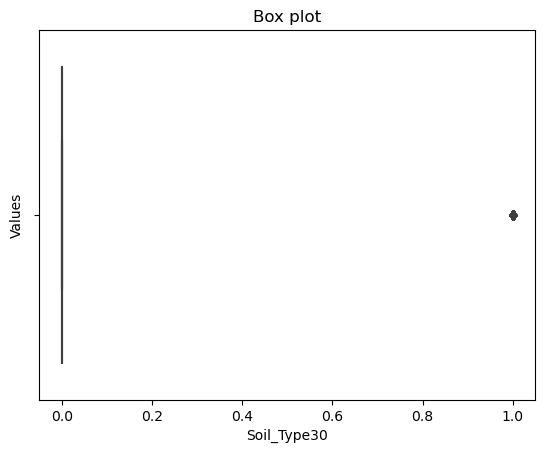

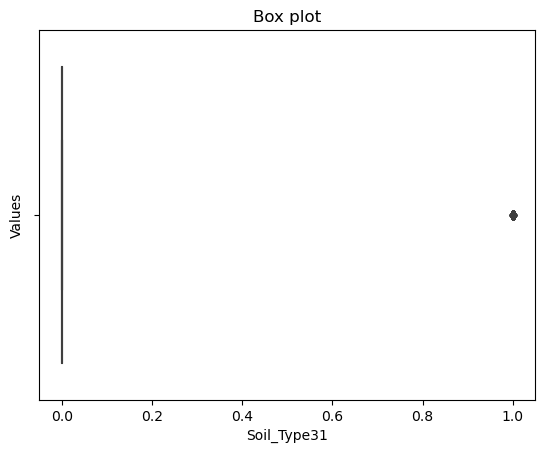

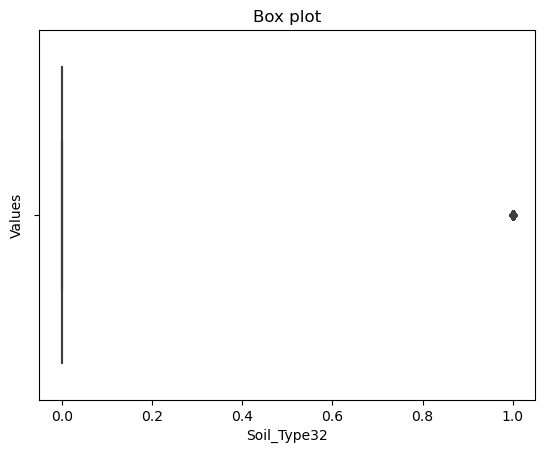

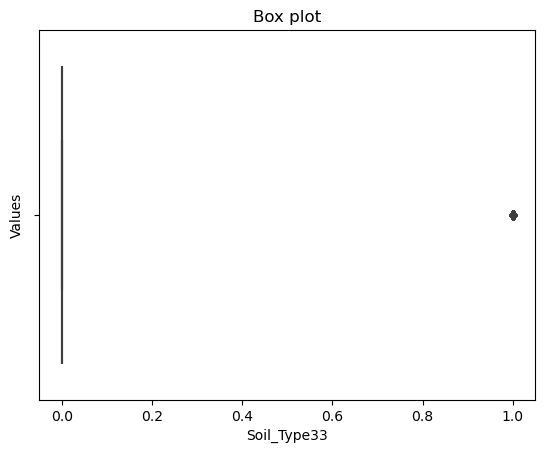

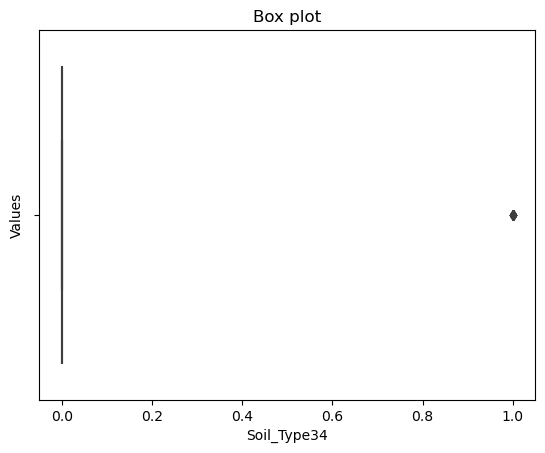

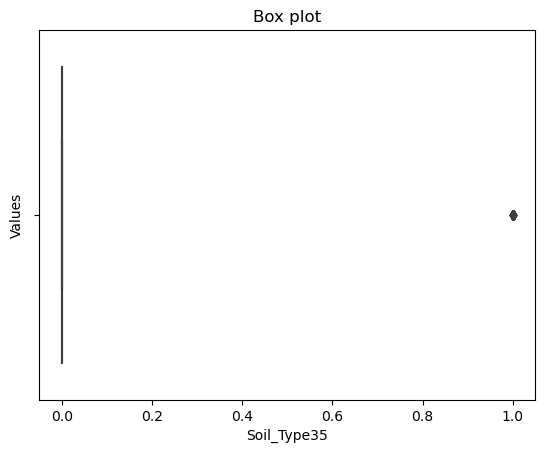

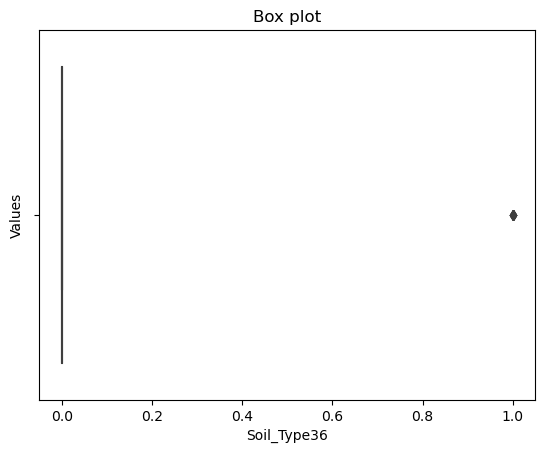

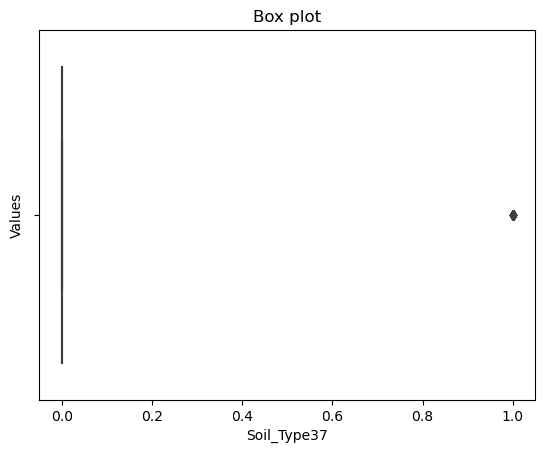

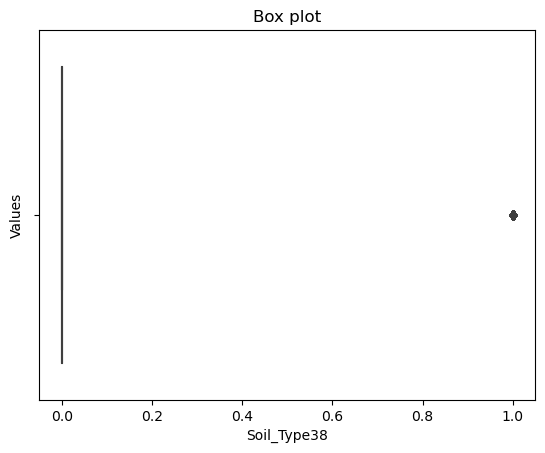

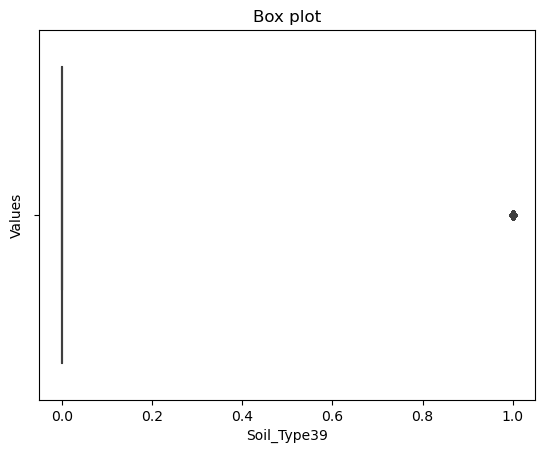

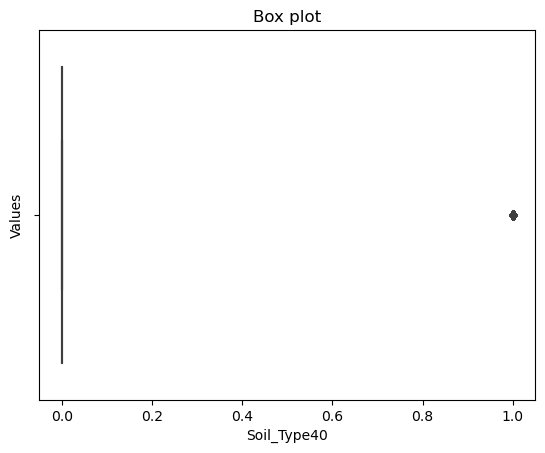

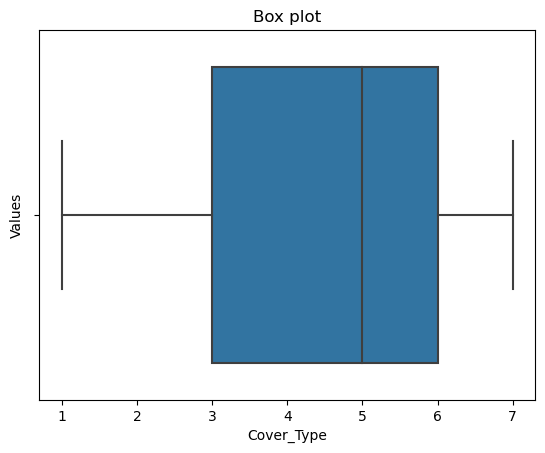

In [20]:
numerical_features = train.select_dtypes(include=[float, int]).columns

for i in numerical_features:
    sns.boxplot(train[i])

    # Customize the plot
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title('Box plot')

    # Display the plot
    plt.show()


In [212]:
train.isnull().sum().sum()

0

In [192]:
test.isnull().sum().sum()

0

In [193]:
val.isnull().sum().sum()

0

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           8286 non-null   int64
 1   Aspect                              8286 non-null   int64
 2   Slope                               8286 non-null   int64
 3   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 4   Vertical_Distance_To_Hydrology      8286 non-null   int64
 5   Horizontal_Distance_To_Roadways     8286 non-null   int64
 6   Hillshade_9am                       8286 non-null   int64
 7   Hillshade_Noon                      8286 non-null   int64
 8   Hillshade_3pm                       8286 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 10  Wilderness_Area1                    8286 non-null   int64
 11  Wilderness_Area2                    8286 non-null   int64
 12  Wilder

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           1525 non-null   int64
 1   Aspect                              1525 non-null   int64
 2   Slope                               1525 non-null   int64
 3   Horizontal_Distance_To_Hydrology    1525 non-null   int64
 4   Vertical_Distance_To_Hydrology      1525 non-null   int64
 5   Horizontal_Distance_To_Roadways     1525 non-null   int64
 6   Hillshade_9am                       1525 non-null   int64
 7   Hillshade_Noon                      1525 non-null   int64
 8   Hillshade_3pm                       1525 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  1525 non-null   int64
 10  Wilderness_Area1                    1525 non-null   int64
 11  Wilderness_Area2                    1525 non-null   int64
 12  Wilder

In [ ]:
val.info()

In [24]:
train.describe()

Elevation       Aspect        Slope  \
count  8286.000000  8286.000000  8286.000000   
mean   2732.983104   155.366643    16.868694   
std     432.906958   108.392758     8.514811   
min    1863.000000     0.000000     0.000000   
25%    2350.000000    66.000000    10.000000   
50%    2720.500000   125.000000    16.000000   
75%    3099.750000   252.000000    23.000000   
max    3849.000000   360.000000    50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                       8286.000000                     8286.000000   
mean                         225.249698                       53.233888   
std                          213.670866                       62.890107   
min                            0.000000                     -134.000000   
25%                           60.000000                        5.000000   
50%                          175.000000                       34.000000   
75%                          323.000000                       84.000000   
max                         1343.000000                      547.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                      8286.000000    8286.000000     8286.000000   
mean                       1629.840574     213.732682      218.534999   
std                        1259.714393      30.675904       23.142959   
min                           0.000000      58.000000       99.000000   
25%                         726.000000     197.000000      206.000000   
50%                        1273.000000     221.000000      222.000000   
75%                        2155.000000     237.000000      235.000000   
max                        6508.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  \
count     8286.00000                         8286.000000  ...  8286.000000   
mean       133.00712                         1461.559739  ...     0.035723   
std         46.73019                         1053.310891  ...     0.185610   
min          0.00000                            0.000000  ...     0.000000   
25%        103.00000                          711.000000  ...     0.000000   
50%        136.00000                         1225.000000  ...     0.000000   
75%        166.00000                         1911.000000  ...     0.000000   
max        248.00000                         6853.000000  ...     1.000000   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
count  8286.000000  8286.000000  8286.000000  8286.000000  8286.000000   
mean      0.031620     0.001328     0.008810     0.000845     0.003259   
std       0.174996     0.036413     0.093453     0.029055     0.056994   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Soil_Type38  Soil_Type39  Soil_Type40   Cover_Type  
count  8286.000000  8286.000000  8286.000000  8286.000000  
mean      0.063481     0.056119     0.040068     4.561550  
std       0.243840     0.230165     0.196130     1.789533  
min       0.000000     0.000000     0.000000     1.000000  
25%       0.000000     0.000000     0.000000     3.000000  
50%       0.000000     0.000000     0.000000     5.000000  
75%       0.000000     0.000000     0.000000     6.000000  
max       1.000000     1.000000     1.000000     7.000000  

[8 rows x 55 columns]

In [25]:
test.describe()

Elevation       Aspect        Slope  \
count  1525.000000  1525.000000  1525.000000   
mean   2735.860984   151.527213    16.545574   
std     430.089563   108.633930     8.511536   
min    1874.000000     0.000000     0.000000   
25%    2349.000000    62.000000    10.000000   
50%    2751.000000   121.000000    15.000000   
75%    3102.000000   243.000000    22.000000   
max    3825.000000   359.000000    46.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                       1525.000000                     1525.000000   
mean                         231.399344                       53.087213   
std                          222.534352                       64.622797   
min                            0.000000                     -108.000000   
25%                           60.000000                        6.000000   
50%                          175.000000                       33.000000   
75%                          330.000000                       78.000000   
max                         1260.000000                      403.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                      1525.000000    1525.000000     1525.000000   
mean                       1694.068197     214.243934      218.283279   
std                        1309.355305      29.533171       23.159036   
min                          30.000000      65.000000      111.000000   
25%                         781.000000     199.000000      206.000000   
50%                        1318.000000     221.000000      222.000000   
75%                        2230.000000     236.000000      234.000000   
max                        6660.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  \
count    1525.000000                         1525.000000  ...  1525.000000   
mean      132.590820                         1454.604590  ...     0.038033   
std        45.322776                         1059.814339  ...     0.191338   
min         0.000000                           30.000000  ...     0.000000   
25%       105.000000                          721.000000  ...     0.000000   
50%       135.000000                         1194.000000  ...     0.000000   
75%       164.000000                         1907.000000  ...     0.000000   
max       240.000000                         6686.000000  ...     1.000000   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
count  1525.000000  1525.000000  1525.000000       1525.0  1525.000000   
mean      0.040656     0.002623     0.007869          0.0     0.003279   
std       0.197556     0.051164     0.088386          0.0     0.057185   
min       0.000000     0.000000     0.000000          0.0     0.000000   
25%       0.000000     0.000000     0.000000          0.0     0.000000   
50%       0.000000     0.000000     0.000000          0.0     0.000000   
75%       0.000000     0.000000     0.000000          0.0     0.000000   
max       1.000000     1.000000     1.000000          0.0     1.000000   

       Soil_Type38  Soil_Type39  Soil_Type40   Cover_Type  
count  1525.000000  1525.000000  1525.000000  1525.000000  
mean      0.049180     0.041967     0.032787     4.043934  
std       0.216315     0.200580     0.178137     1.974918  
min       0.000000     0.000000     0.000000     1.000000  
25%       0.000000     0.000000     0.000000     2.000000  
50%       0.000000     0.000000     0.000000     4.000000  
75%       0.000000     0.000000     0.000000     6.000000  
max       1.000000     1.000000     1.000000     7.000000  

[8 rows x 55 columns]

In [ ]:
val.describe()

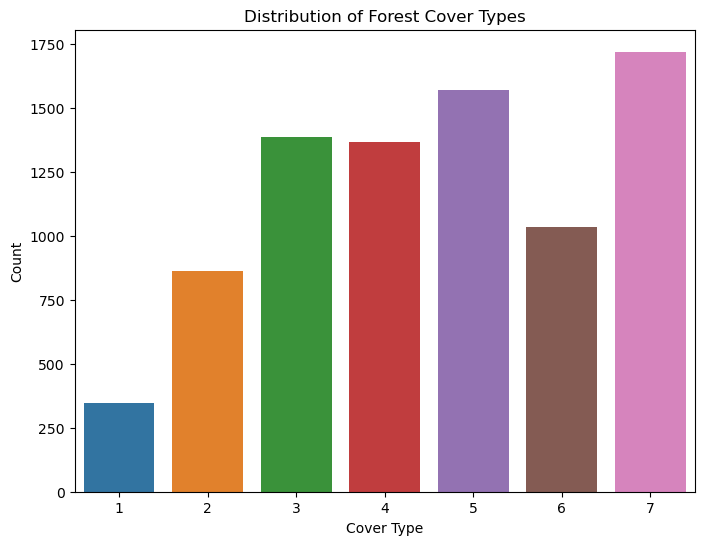

In [187]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=train)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

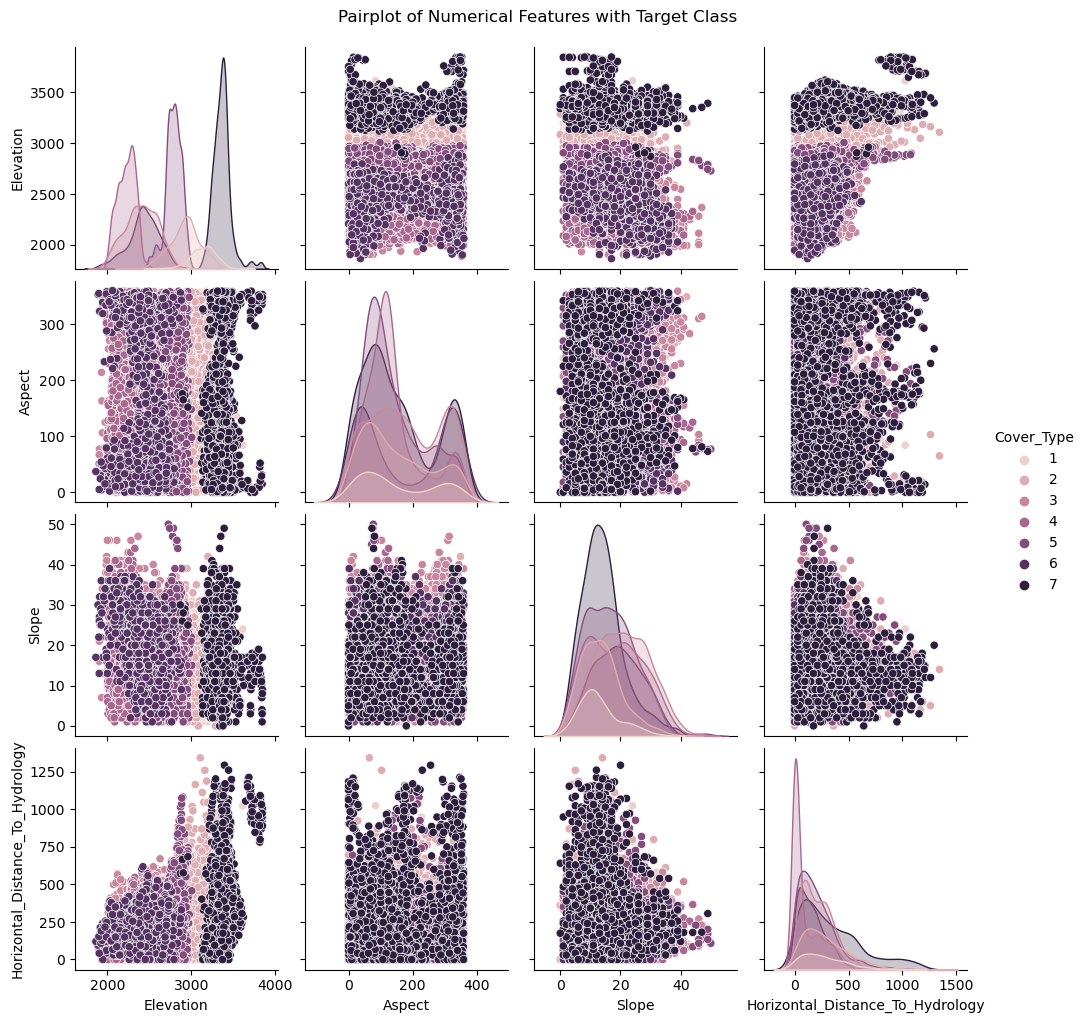

In [188]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(train, hue='Cover_Type', vars=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology'], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features with Target Class', y=1.02)
plt.show()

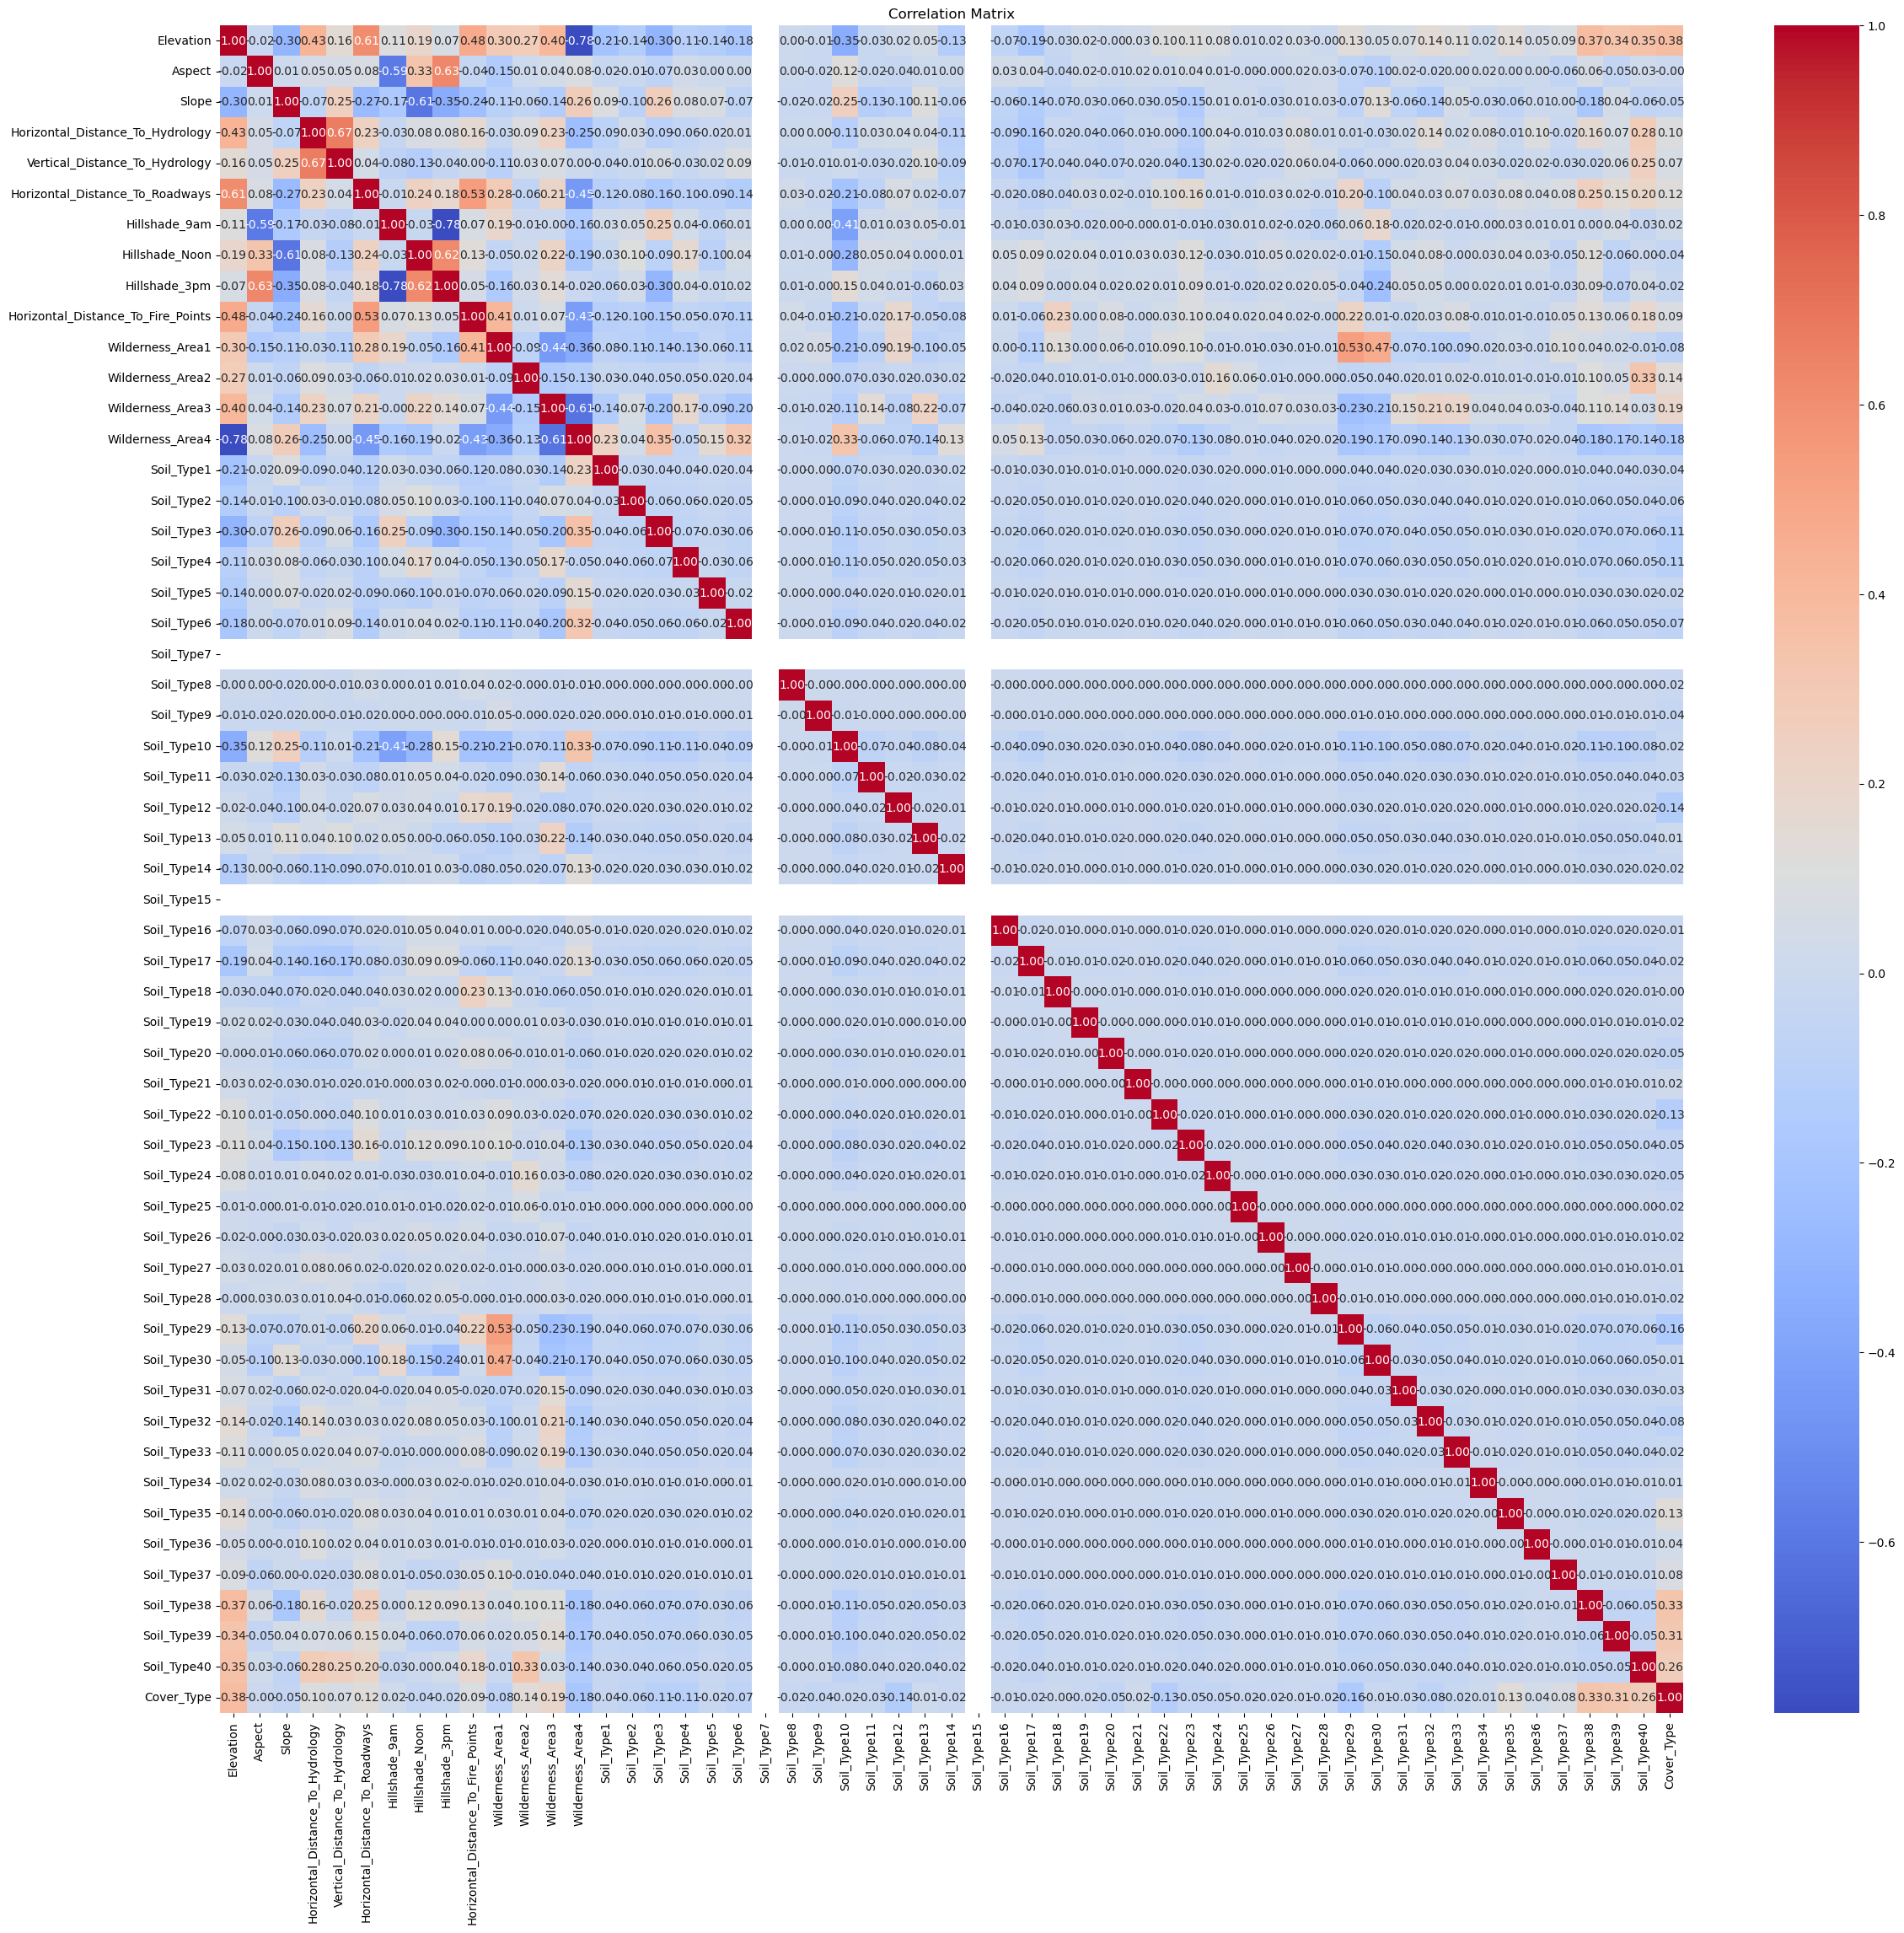

In [190]:
correlation_matrix = train.corr()
plt.figure(figsize=(28, 26))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

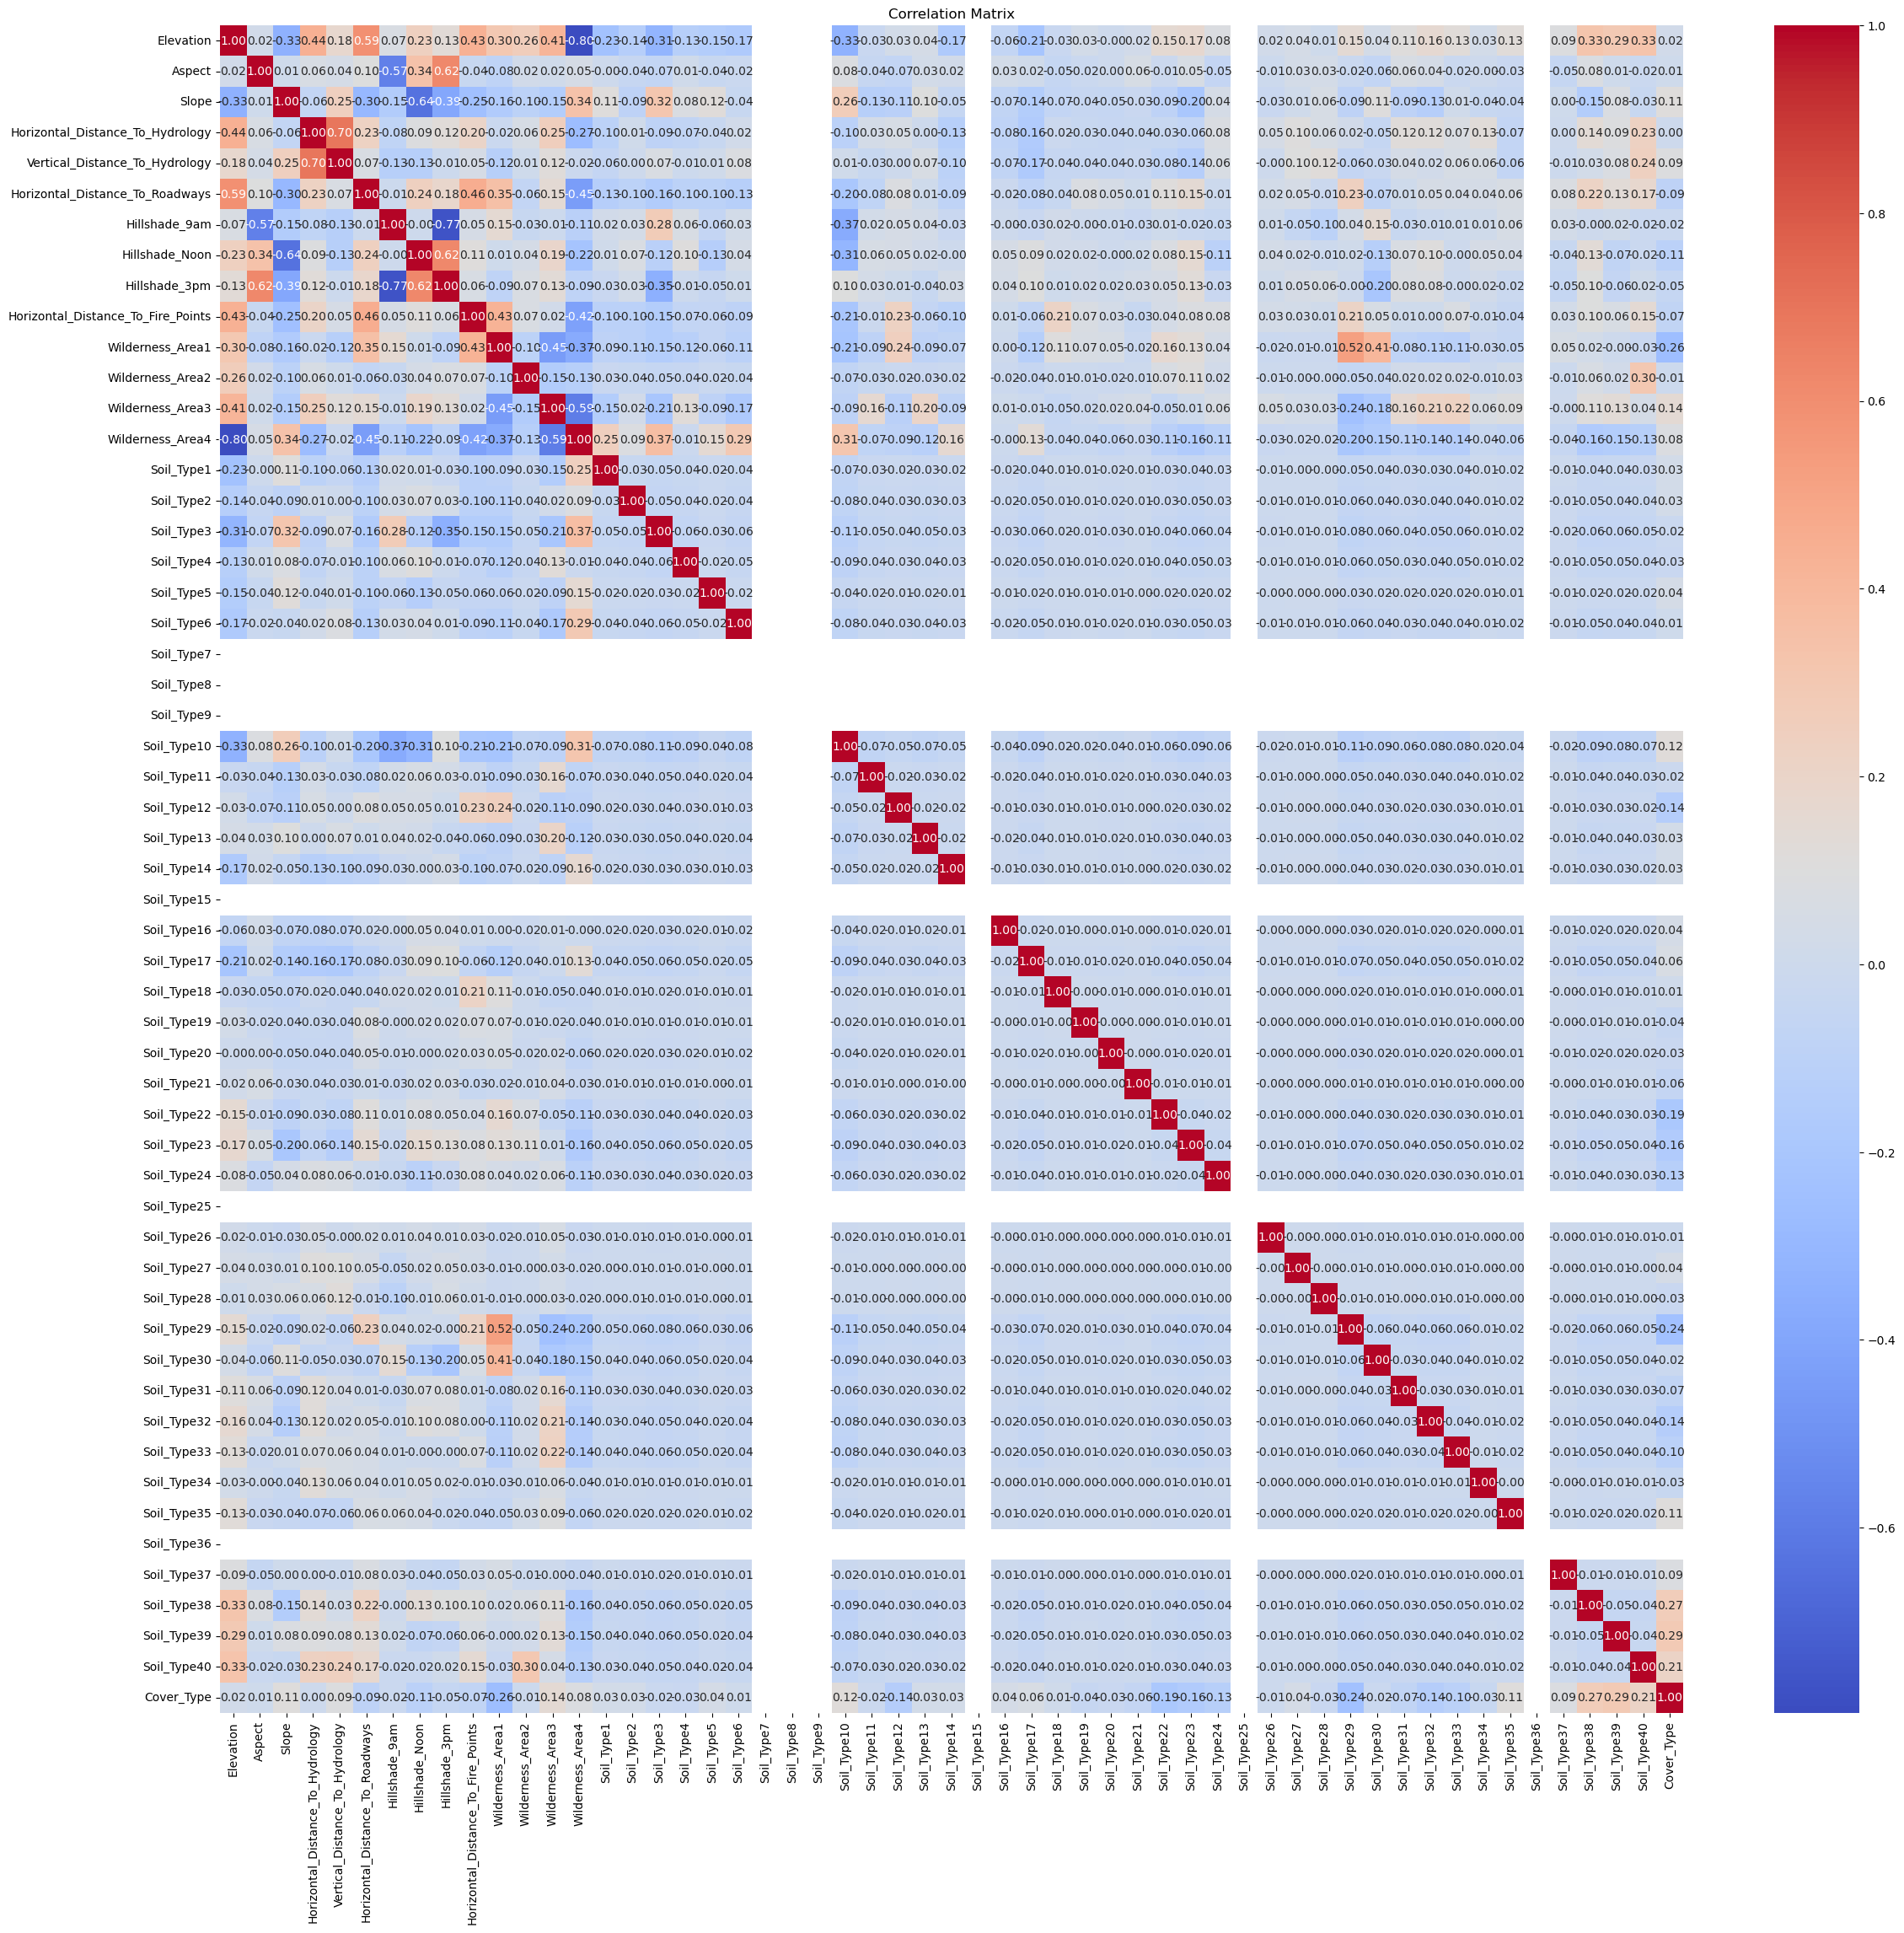

In [211]:
correlation_matrix = test.corr()
plt.figure(figsize=(28, 26))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Tsne plot for training and test data

In [27]:
#TSNE for training dataset
tsne = TSNE(n_components=2, random_state=42)  
tsne_train = tsne.fit_transform(train)
tsne_test = tsne.fit_transform(test)

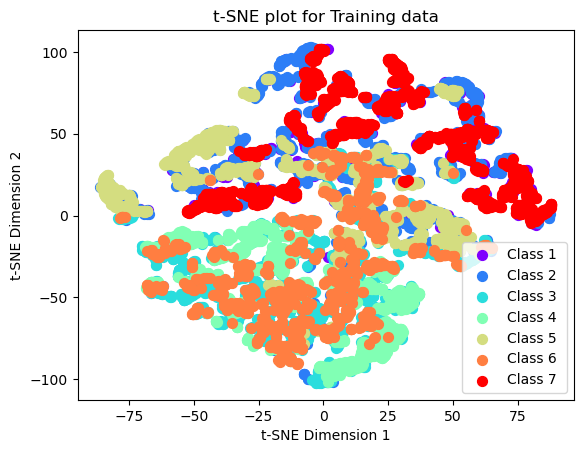

In [28]:
#ploting tsne for training

unique_labels = train["Cover_Type"].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.title('t-SNE plot for Training data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Scatter plot for each class
for i, label in enumerate(unique_labels):
    class_data = tsne_train[train["Cover_Type"] == label]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], s=50, label=f"Class {label} ")

# Show the legend
plt.legend()
plt.show()


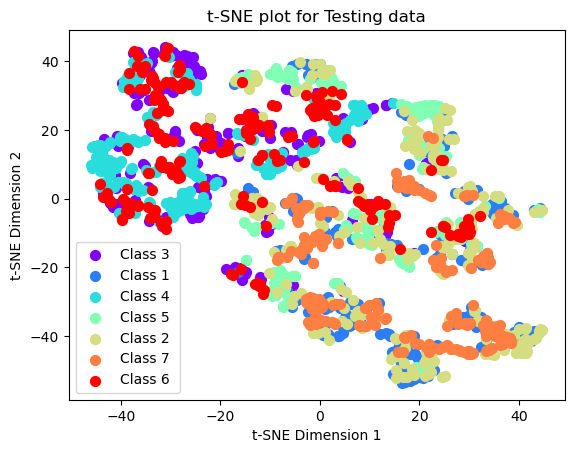

In [29]:
#ploting tsne for training

# Getting unique class labels and corresponding colors from the 'Cover_Type' column
unique_labels = test["Cover_Type"].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.title('t-SNE plot for Testing data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Scatter plot for each class
for i, label in enumerate(unique_labels):
    class_data = tsne_test[test["Cover_Type"] == label]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], s=50, label=f"Class {label} ")

# Show the legend
plt.legend()
plt.show()


# Baseline Performances



In [30]:
X_train = train.iloc[:,:-1]
y_train = train["Cover_Type"]
X_test = test.iloc[:,:-1]
y_test = test["Cover_Type"]
X_val= val.iloc[:,:-1]
y_val=val["Cover_Type"]

# KNN

In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

KNN Accuracy: 73.8360655737705
              precision    recall  f1-score   support

           1       0.69      0.22      0.34       197
           2       0.61      0.48      0.54       230
           3       0.73      0.75      0.74       195
           4       0.86      0.98      0.91       247
           5       0.69      0.97      0.80       215
           6       0.79      0.71      0.75       225
           7       0.74      1.00      0.85       216

    accuracy                           0.74      1525
   macro avg       0.73      0.73      0.70      1525
weighted avg       0.73      0.74      0.71      1525



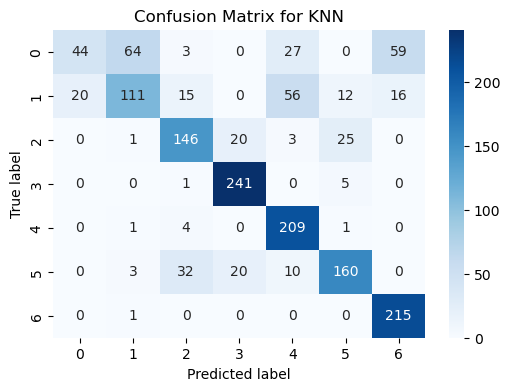

True Positives (TP): 111
True Negatives (TN): 44
False Positives (FP): 64
False Negatives (FN): 20


In [89]:
knn_acc = accuracy_score(y_test, y_pred_knn)*100
print("KNN Accuracy:", knn_acc)

print(classification_report(y_test, y_pred_knn))
knn_cm=confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(knn_cm,"Confusion Matrix for KNN")
calculate_tp_tn_fp_fn(y_test,y_pred_knn,knn_cm)

# Logistic Regression

In [33]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr= lr_model.predict(X_test)

Logistic Regression Accuracy :  47.40983606557377
              precision    recall  f1-score   support

           1       0.38      0.02      0.03       197
           2       0.45      0.35      0.39       230
           3       0.37      0.42      0.40       195
           4       0.65      0.78      0.71       247
           5       0.35      0.60      0.44       215
           6       0.42      0.16      0.23       225
           7       0.54      0.92      0.68       216

    accuracy                           0.47      1525
   macro avg       0.45      0.46      0.41      1525
weighted avg       0.46      0.47      0.42      1525



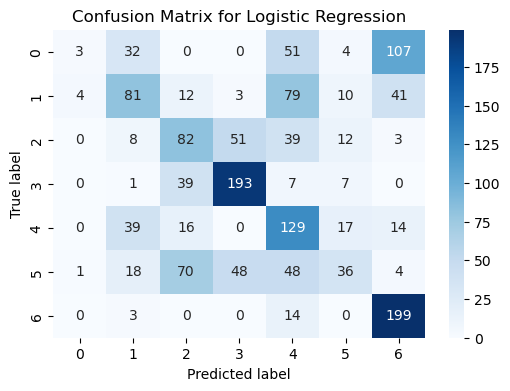

True Positives (TP): 81
True Negatives (TN): 3
False Positives (FP): 32
False Negatives (FN): 4


In [88]:
lr_acc=accuracy_score(y_test,y_pred_lr)*100
print("Logistic Regression Accuracy : ",lr_acc)
print(classification_report(y_test, y_pred_lr))
lr_cm=confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(lr_cm,"Confusion Matrix for Logistic Regression")
calculate_tp_tn_fp_fn(y_test,y_pred_lr,lr_cm)

# SVM

In [35]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

SVM Accuracy: 56.131147540983605
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       197
           2       0.54      0.40      0.46       230
           3       0.41      0.66      0.50       195
           4       0.66      0.82      0.73       247
           5       0.53      0.92      0.67       215
           6       0.65      0.08      0.14       225
           7       0.65      1.00      0.79       216

    accuracy                           0.56      1525
   macro avg       0.63      0.56      0.47      1525
weighted avg       0.63      0.56      0.48      1525



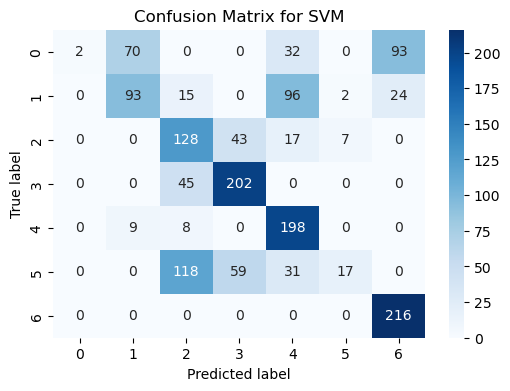

True Positives (TP): 93
True Negatives (TN): 2
False Positives (FP): 70
False Negatives (FN): 0


In [87]:
svm_acc = accuracy_score(y_test, y_pred_svm)*100
print("SVM Accuracy:", svm_acc)

print(classification_report(y_test, y_pred_svm))
svm_cm=confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(svm_cm,"Confusion Matrix for SVM")
calculate_tp_tn_fp_fn(y_test,y_pred_svm,svm_cm)

# Decision Tree

In [37]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)

Decision Tree Accuracy: 76.1311475409836
              precision    recall  f1-score   support

           1       0.63      0.39      0.48       197
           2       0.60      0.62      0.61       230
           3       0.69      0.71      0.70       195
           4       0.91      0.94      0.92       247
           5       0.82      0.91      0.86       215
           6       0.76      0.76      0.76       225
           7       0.83      0.96      0.89       216

    accuracy                           0.76      1525
   macro avg       0.75      0.75      0.75      1525
weighted avg       0.75      0.76      0.75      1525



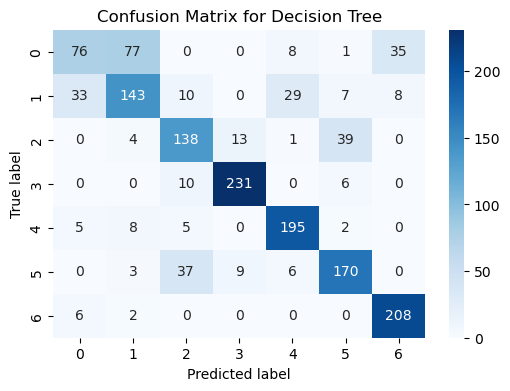

True Positives (TP): 143
True Negatives (TN): 76
False Positives (FP): 77
False Negatives (FN): 33


In [86]:
dt_acc=accuracy_score(y_test,y_pred_dt)*100
print("Decision Tree Accuracy:",dt_acc)

print(classification_report(y_test,y_pred_dt))
dt_cm=confusion_matrix(y_test,y_pred_dt)
plot_confusion_matrix(dt_cm,"Confusion Matrix for Decision Tree")
calculate_tp_tn_fp_fn(y_test,y_pred_dt,dt_cm)

In [39]:
dt_acc_baseline=dt_acc/100

# Naive Bayes

In [40]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)

Naive Bayes Accuracy: 60.13114754098361
              precision    recall  f1-score   support

           1       0.50      0.74      0.59       197
           2       0.83      0.13      0.22       230
           3       0.41      0.66      0.50       195
           4       0.67      0.95      0.78       247
           5       0.58      0.77      0.66       215
           6       0.88      0.09      0.17       225
           7       0.88      0.89      0.88       216

    accuracy                           0.60      1525
   macro avg       0.68      0.60      0.54      1525
weighted avg       0.68      0.60      0.54      1525



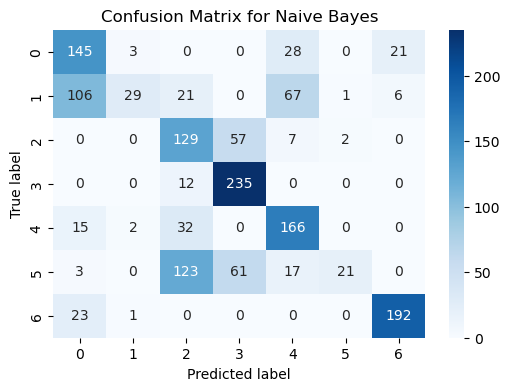

True Positives (TP): 29
True Negatives (TN): 145
False Positives (FP): 3
False Negatives (FN): 106


In [85]:
nb_acc=accuracy_score(y_test,y_pred_nb)*100
print("Naive Bayes Accuracy:",nb_acc)

print(classification_report(y_test,y_pred_nb))
nb_cm=confusion_matrix(y_test,y_pred_nb)
plot_confusion_matrix(nb_cm,"Confusion Matrix for Naive Bayes")
calculate_tp_tn_fp_fn(y_test,y_pred_nb,nb_cm)

# Bar chart for accuracies

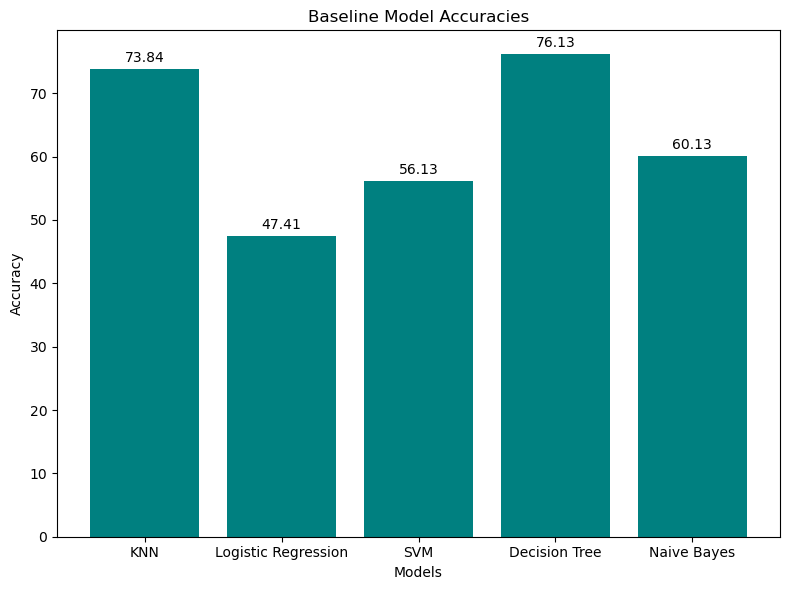

In [42]:
baseline_accuracies = [knn_acc, lr_acc, svm_acc, dt_acc, nb_acc]
model_names = ["KNN", "Logistic Regression", "SVM", "Decision Tree", "Naive Bayes"]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, baseline_accuracies, color='Teal')
# colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Baseline Model Accuracies")

def add_accuracies_labels():
    for bar, acc in zip(bars, baseline_accuracies):
        height = bar.get_height()
        plt.annotate(f'{acc:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

add_accuracies_labels()

plt.tight_layout()
plt.show()


# Conclusion 

The best two baseline models are Decision Tree and KNN

# PCA for KNN

In [43]:
knn_acc_baseline = knn_acc/100

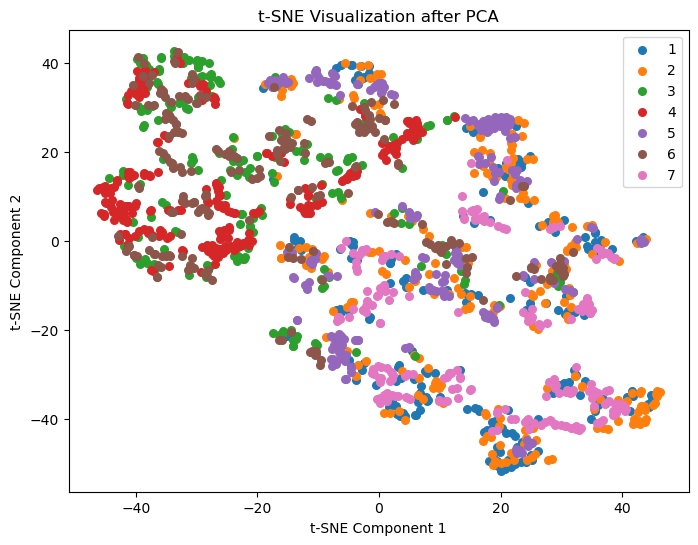

In [44]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X_train)
pca_result = pca.transform(X_test)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(tsne_result[y_test == label, 0], tsne_result[y_test == label, 1], label=label, s=30)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization after PCA')
plt.legend()
plt.show()


In [45]:
n_components=10
num_features_range = range(1, X_train.shape[1] + 1)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [46]:
pca_accuracy_scores_knn = []
for num_features in num_features_range:
    
    # KNN Model
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca[:,:num_features], y_train)
    y_pred_knn_pca = knn.predict(X_test_pca[:,:num_features])
    mean_accuracy_knn_pca=accuracy_score(y_test, y_pred_knn_pca)
    pca_accuracy_scores_knn.append(mean_accuracy_knn_pca)
best_k_knn_pca = np.argmax(pca_accuracy_scores_knn) 
print("Best 'k' value:", best_k_knn_pca)
print(pca_accuracy_scores_knn[best_k_knn_pca])

Best 'k' value: 7
0.7383606557377049


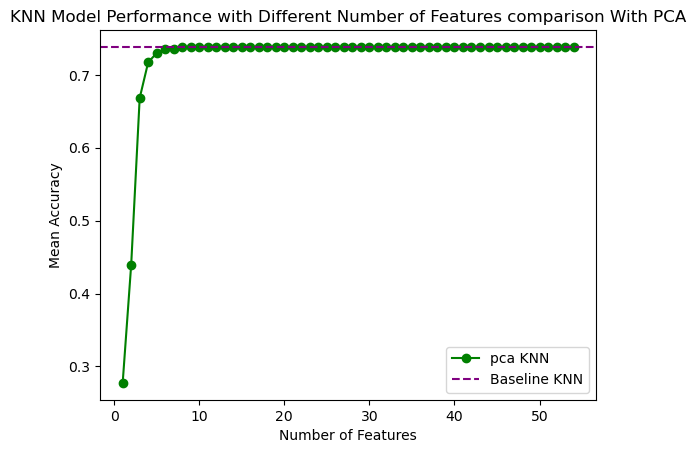

In [161]:
plt.plot(num_features_range,pca_accuracy_scores_knn, marker='o', color="green", label='pca KNN')
plt.axhline(y=knn_acc_baseline, linestyle='--', color="purple", label='Baseline KNN')

plt.xlabel('Number of Features')
plt.ylabel('Mean Accuracy')
plt.title('KNN Model Performance with Different Number of Features comparison With PCA')

plt.legend()


plt.show()

# PCA for Decision Tree

In [48]:
pca_accuracy_scores_dt=[]
for num_features in num_features_range:
    n_components = 10

    # KNN Model
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_pca[:,:num_features], y_train)
    y_pred_dt_pca = dt.predict(X_test_pca[:,:num_features])
    mean_accuracy_dt_pca=accuracy_score(y_test, y_pred_dt_pca)
    pca_accuracy_scores_dt.append(mean_accuracy_dt_pca)
best_k_dt_pca = np.argmax(pca_accuracy_scores_dt)
print("Best 'k' value:", best_k_dt_pca)
print(pca_accuracy_scores_dt[best_k_dt_pca])

Best 'k' value: 4
0.7272131147540983


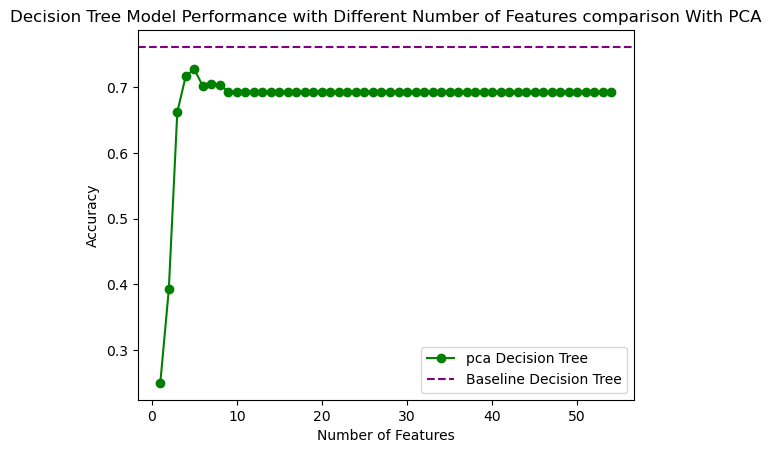

In [49]:
plt.plot(num_features_range,pca_accuracy_scores_dt, marker='o', color="green", label='pca Decision Tree')
plt.axhline(y=dt_acc_baseline, linestyle='--', color="purple", label='Baseline Decision Tree')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Performance with Different Number of Features comparison With PCA')

plt.legend()


plt.show()

# Feature selection 

## filter approach (mutual_info_classif) for KNN

In [50]:
num_features_range = range(1, X_train.shape[1] + 1)
accuracy_scores_knn_filter = []

for num_features in num_features_range:
    selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected= selector . transform(X_test)

    # KNN Model
    knn_filter = KNeighborsClassifier()
    knn_filter.fit(X_train_selected,y_train)
    y_pred_knn_filter=knn_filter.predict(X_test_selected)
    knn_acc_filter= accuracy_score(y_pred_knn_filter,y_test)

    accuracy_scores_knn_filter.append(knn_acc_filter)



In [51]:
best_k_knn_filter =  np.argmax(accuracy_scores_knn_filter)
print("Best 'k' value for KNN using filter approach:", best_k_knn_filter)
print(max(accuracy_scores_knn_filter))

Best 'k' value for KNN using filter approach: 20
0.7383606557377049


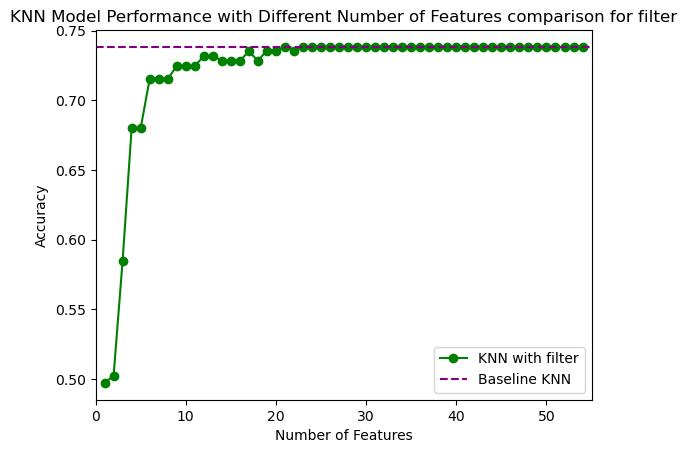

In [52]:
plt.plot(num_features_range, accuracy_scores_knn_filter, marker='o', color="green", label='KNN with filter')
plt.axhline(y=knn_acc_baseline, linestyle='--', color="purple", label='Baseline KNN')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('KNN Model Performance with Different Number of Features comparison for filter')

plt.legend()
plt.xlim(0, 55)
plt.show()


[[ 44  64   3   0  27   0  59]
 [ 20 111  15   0  56  12  16]
 [  0   1 146  20   3  25   0]
 [  0   0   1 241   0   5   0]
 [  0   1   4   0 209   1   0]
 [  0   3  32  20  10 160   0]
 [  0   1   0   0   0   0 215]]


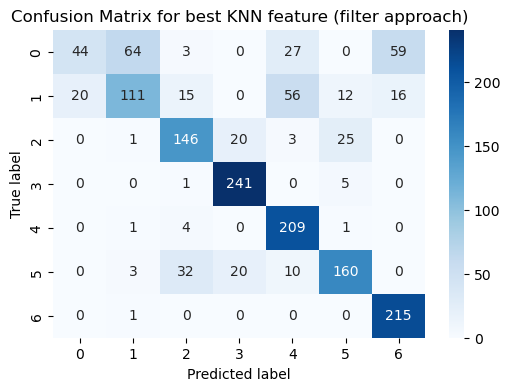

True Positives (TP): 111
True Negatives (TN): 44
False Positives (FP): 64
False Negatives (FN): 20


In [84]:
selector_knn_filter_best = SelectKBest(score_func=mutual_info_classif, k=best_k_knn_filter)
X_train_knn_filter_best = selector_knn_filter_best.fit_transform(X_train, y_train)
X_test_knn_filter_best= selector_knn_filter_best . transform(X_test)

# KNN Model
knn_filter_best = KNeighborsClassifier()
knn_filter_best.fit(X_train_knn_filter_best,y_train)
y_pred_knn_filter_best=knn_filter.predict(X_test_knn_filter_best)
cm_knn_filter_best = confusion_matrix(y_test, y_pred_knn_filter_best)
# print(cm_knn_filter_best)
plot_confusion_matrix(cm_knn_filter_best,"Confusion Matrix for best KNN feature (filter approach)")
calculate_tp_tn_fp_fn(y_test,y_pred_knn_filter_best,cm_knn_filter_best)

# Filter approach (mutual_info_classif) for Decision Tree

In [53]:
num_features_range = range(1, X_train.shape[1] + 1)
accuracy_scores_dt_filter = []

for num_features in num_features_range:
    # Perform feature selection using mutual information on the training set
    selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Decision Tree Model
    dt_filter = DecisionTreeClassifier()
    dt_filter.fit(X_train_selected,y_train)
    y_pred_dt_filter=dt_filter.predict(X_test_selected)
    dt_acc_filter= accuracy_score(y_pred_dt_filter,y_test)

    accuracy_scores_dt_filter.append(dt_acc_filter)


In [54]:
best_k_dt_filter = np.argmax(accuracy_scores_dt_filter) 
print("Best 'k' value for DT using filter approach:", best_k_dt_filter)
print(max(accuracy_scores_dt_filter))

Best 'k' value for DT using filter approach: 24
0.7659016393442623


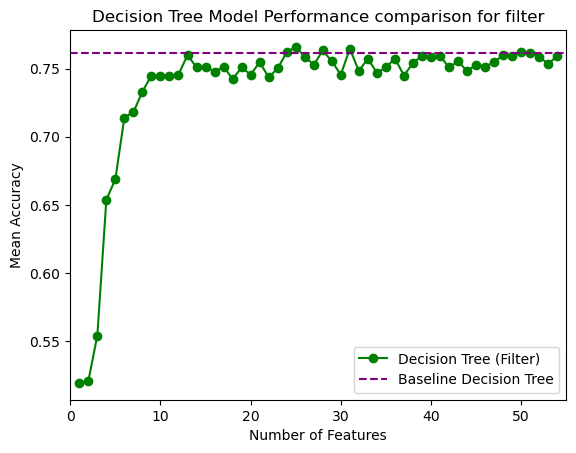

In [55]:
plt.plot(num_features_range, accuracy_scores_dt_filter, marker='o', color="green", label='Decision Tree (Filter)')
plt.axhline(y=dt_acc_baseline, linestyle='--', color="purple", label='Baseline Decision Tree')

plt.xlabel('Number of Features')
plt.ylabel('Mean Accuracy')
plt.title('Decision Tree Model Performance comparison for filter')

plt.legend()
plt.xlim(0, 55)
plt.show()


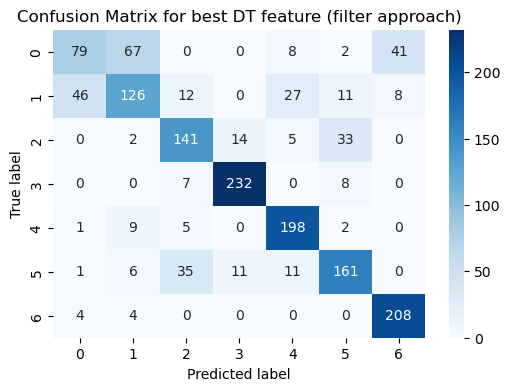

True Positives (TP): 126
True Negatives (TN): 79
False Positives (FP): 67
False Negatives (FN): 46


In [214]:
selector_dt_filter_best = SelectKBest(score_func=mutual_info_classif, k=best_k_dt_filter)
X_train_dt_filter_best = selector_dt_filter_best.fit_transform(X_train, y_train)
X_test_dt_filter_best= selector_dt_filter_best . transform(X_test)

# KNN Model
dt_filter_best = DecisionTreeClassifier()
dt_filter_best.fit(X_train_dt_filter_best,y_train)
y_pred_dt_filter_best=dt_filter_best.predict(X_test_dt_filter_best)
cm_dt_filter_best = confusion_matrix(y_test, y_pred_dt_filter_best)
# print(cm_knn_filter_best)
plot_confusion_matrix(cm_dt_filter_best,"Confusion Matrix for best DT feature (filter approach)")
calculate_tp_tn_fp_fn(y_test,y_pred_dt_filter_best,cm_dt_filter_best)

## Wrapper aaproach (RFE) for KNN

In [56]:
num_features_range = range(1, X_train.shape[1] + 1)
accuracy_rfe_knn_wrapper = []
for n in num_features_range:
    selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=n)
    x_train_selected = selector.fit_transform(X_train, y_train)
    x_test_selected = selector.transform(X_test)

    # K-Nearest Neighbors
    knn_wrapper = KNeighborsClassifier()
    knn_wrapper.fit(x_train_selected, y_train)
    y_pred_knn_wrapper = knn_wrapper.predict(x_test_selected)
    accuracy_knn_wrapper = accuracy_score(y_test, y_pred_knn_wrapper)
    accuracy_rfe_knn_wrapper.append(accuracy_knn_wrapper)


In [57]:
best_accuracy_knn_wrapper = max(accuracy_rfe_knn_wrapper)
best_k_knn_wrapper = num_features_range[accuracy_rfe_knn_wrapper.index(best_accuracy_knn_wrapper)]

print(f"The best k value for accuracy is: {best_k_knn_wrapper}")
print("best accuracy is :",max(accuracy_rfe_knn_wrapper))

The best k value for accuracy is: 11
best accuracy is : 0.7383606557377049


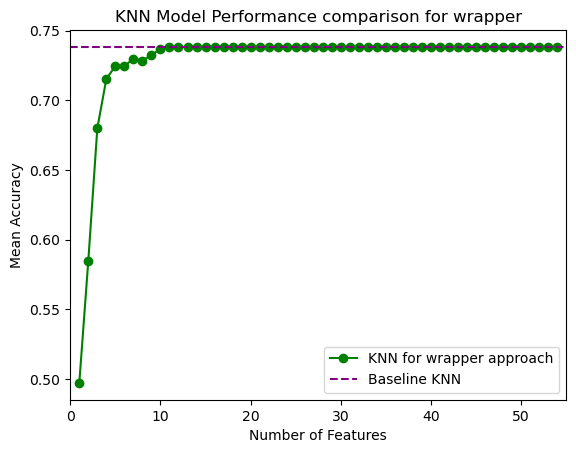

In [58]:
plt.plot(num_features_range, accuracy_rfe_knn_wrapper, marker='o', color="green", label='KNN for wrapper approach')
plt.axhline(y=knn_acc_baseline, linestyle='--', color="purple", label='Baseline KNN')

plt.xlabel('Number of Features')
plt.ylabel('Mean Accuracy')
plt.title('KNN Model Performance comparison for wrapper')

plt.legend()
plt.xlim(0, 55)
plt.show()


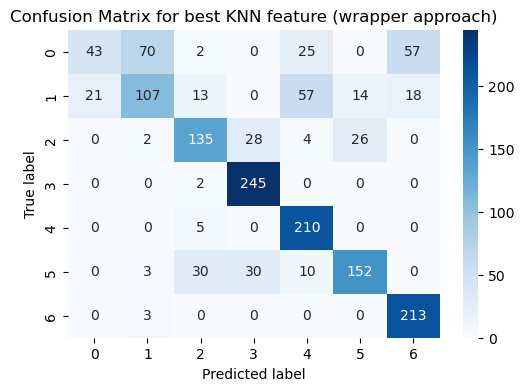

True Positives (TP): 107
True Negatives (TN): 43
False Positives (FP): 70
False Negatives (FN): 21


In [215]:
selector_knn_wrapper_best = SelectKBest(score_func=mutual_info_classif, k=best_k_knn_wrapper)
X_train_knn_wrapper_best = selector_knn_wrapper_best.fit_transform(X_train, y_train)
X_test_knn_wrapper_best= selector_knn_wrapper_best . transform(X_test)

# KNN Model
knn_wrapper_best = KNeighborsClassifier()
knn_wrapper_best.fit(X_train_knn_wrapper_best,y_train)
y_pred_knn_wrapper_best=knn_wrapper_best.predict(X_test_knn_wrapper_best)
cm_knn_wrapper_best = confusion_matrix(y_test, y_pred_knn_wrapper_best)

plot_confusion_matrix(cm_knn_wrapper_best,"Confusion Matrix for best KNN feature (wrapper approach)")
calculate_tp_tn_fp_fn(y_test,y_pred_knn_wrapper_best,cm_knn_wrapper_best)

# Wrapper approach (RFE) for Decision Tree

In [59]:
accuracy_rfe_dt_wrapper = []
for n in num_features_range:
    selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=n)
    x_train_selected = selector.fit_transform(X_train, y_train)
    x_test_selected = selector.transform(X_test)
    
    #DT model
    dt_wrapper = DecisionTreeClassifier()
    dt_wrapper.fit(x_train_selected, y_train)
    y_pred_dt_wrapper = dt_wrapper.predict(x_test_selected)
    
    accuracy_dt_wrapper = accuracy_score(y_test, y_pred_dt_wrapper)
    accuracy_rfe_dt_wrapper.append(accuracy_dt_wrapper)

In [60]:
best_accuracy_dt_wrapper = max(accuracy_rfe_dt_wrapper)
best_k_dt_wrapper = num_features_range[accuracy_rfe_dt_wrapper.index(best_accuracy_dt_wrapper)]

print(f"The best k value for accuracy is: {best_k_dt_wrapper}")
print("best accuracy is :",max(accuracy_rfe_dt_wrapper))

The best k value for accuracy is: 29
best accuracy is : 0.7678688524590164


In [61]:
best_selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=best_k_dt_wrapper)
x_train_selected_best = best_selector.fit_transform(X_train, y_train)
selected_feature_indices = best_selector.get_support(indices=True)

# Get the column names of the selected features from the original dataset
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the selected feature names
print(f"The best {best_k_dt_wrapper} features selected are:")
print(selected_feature_names)

The best 29 features selected are:
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type17', 'Soil_Type23', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type32', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],
      dtype='object')


In [79]:
# Create the new X_train DataFrame with the best selected features
X_train_best_features = X_train.iloc[:, selected_feature_indices]

# Print the new X_train DataFrame
print("New X_train with best selected features:")
# print(X_train_best_features)


New X_train with best selected features:


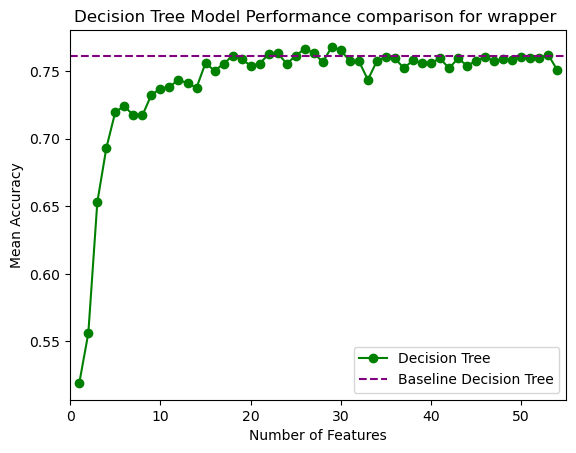

In [63]:
plt.plot(num_features_range, accuracy_rfe_dt_wrapper, marker='o', color="green", label='Decision Tree')
plt.axhline(y=dt_acc_baseline, linestyle='--', color="purple", label='Baseline Decision Tree')

plt.xlabel('Number of Features')
plt.ylabel('Mean Accuracy')
plt.title('Decision Tree Model Performance comparison for wrapper ')

plt.legend()
plt.xlim(0, 55)
plt.show()


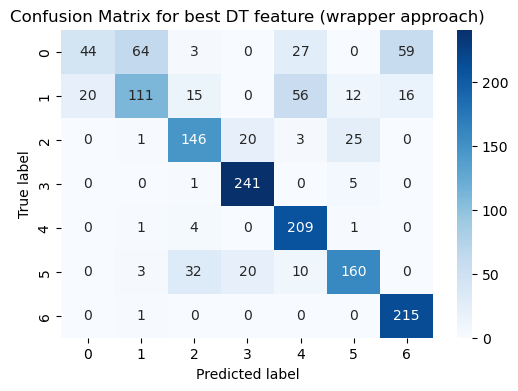

True Positives (TP): 111
True Negatives (TN): 44
False Positives (FP): 64
False Negatives (FN): 20


In [218]:
selector_dt_wrapper_best = SelectKBest(score_func=mutual_info_classif, k=best_k_dt_wrapper)
X_train_dt_wrapper_best = selector_dt_wrapper_best.fit_transform(X_train, y_train)
X_test_dt_wrapper_best= selector_dt_wrapper_best . transform(X_test)

# KNN Model
dt_wrapper_best = KNeighborsClassifier()
dt_wrapper_best.fit(X_train_dt_wrapper_best,y_train)
y_pred_dt_wrapper_best=dt_wrapper_best.predict(X_test_dt_wrapper_best)
cm_dt_wrapper_best = confusion_matrix(y_test, y_pred_dt_wrapper_best)

plot_confusion_matrix(cm_dt_wrapper_best,"Confusion Matrix for best DT feature (wrapper approach)")
calculate_tp_tn_fp_fn(y_test,y_pred_dt_wrapper_best,cm_dt_wrapper_best)

# Conclusion 

when deciding between the Decision Tree model with the wrapper approach and the other alternatives (Decision Tree with filter, KNN with filter, and KNN with wrapper), the Decision Tree model with the wrapper approach emerges as the preferred choice. Its ability to provide a more comprehensive evaluation, enhanced interpretability, and relatively lower computational overhead make it an ideal option for many real-world applications, where the focus is on accuracy, transparency, and efficiency. However, it's important to note that the best model ultimately depends on the specific characteristics of the dataset and the objectives of the task at hand, and it is always advisable to conduct thorough experimentation and validation before finalizing the model choice.


##    ____________________________________________________________________________

In [64]:
best_selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=best_k_dt_filter)
x_train_selected_best = best_selector.fit_transform(X_train, y_train)
selected_feature_indices = best_selector.get_support(indices=True)

selected_feature_names = X_train.columns[selected_feature_indices]

print(f"The best {best_k_dt_filter} features selected are:")
print(selected_feature_names)

The best 24 features selected are:
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type10', 'Soil_Type13', 'Soil_Type17',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],
      dtype='object')


In [199]:
# Create the new X_train DataFrame with the best selected features
X_train_best_features = X_train.iloc[:, selected_feature_indices]
X_test_best_features = X_test.iloc[:, selected_feature_indices]
X_val_best_features = X_val.iloc[:, selected_feature_indices]

# Print the new X_train DataFrame
# print("New X_train with best selected features:")
X_train_best_features


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2976      85     23                                95   
1          3104     233     12                               150   
2          3385     160      7                               937   
3          3191      41     14                               210   
4          2821     297      4                                85   
...         ...     ...    ...                               ...   
8281       3294     328     13                               624   
8282       3390      24      6                               216   
8283       3350     100     18                               175   
8284       3727       5     17                               984   
8285       3379     180      0                               175   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 72                             2436   
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
8281                             192                             3506   
8282                              13                             3332   
8283                             -26                             2121   
8284                             318                             4934   
8285                              37                             2672   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0               246             193             64   
1               200             251            186   
2               228             242            147   
3               221             208            119   
4               208             238            169   
...             ...             ...            ...   
8281            188             224            175   
8282            217             226            146   
8283            247             212             88   
8284            195             204            143   
8285            219             238            157   

      Horizontal_Distance_To_Fire_Points  ...  Soil_Type3  Soil_Type4  \
0                                    836  ...           0           0   
1                                   1129  ...           0           0   
2                                    752  ...           0           0   
3                                    865  ...           0           0   
4                                    242  ...           0           0   
...                                  ...  ...         ...         ...   
8281                                3583  ...           0           0   
8282                                2226  ...           0           0   
8283                                3322  ...           0           0   
8284                                3092  ...           0           0   
8285                                2388  ...           0           0   

      Soil_Type10  Soil_Type13  Soil_Type17  Soil_Type29  Soil_Type30  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8281            0            0            0            0            0   
8282            0            0            0            0            0   
8283            0            0            0            0            0   
8284            0            0            0            0

# Random Forest

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train_best_features, y_train)
y_pred_rf_test=rf.predict(X_test_best_features)
y_pred_rf_train=rf.predict(X_train_best_features)

Random Forest Accuracy: 0.8118032786885246
              precision    recall  f1-score   support

           1       0.82      0.38      0.52       197
           2       0.71      0.73      0.72       230
           3       0.75      0.83      0.79       195
           4       0.89      0.99      0.93       247
           5       0.83      0.97      0.89       215
           6       0.88      0.74      0.80       225
           7       0.80      0.99      0.89       216

    accuracy                           0.81      1525
   macro avg       0.81      0.80      0.79      1525
weighted avg       0.81      0.81      0.80      1525



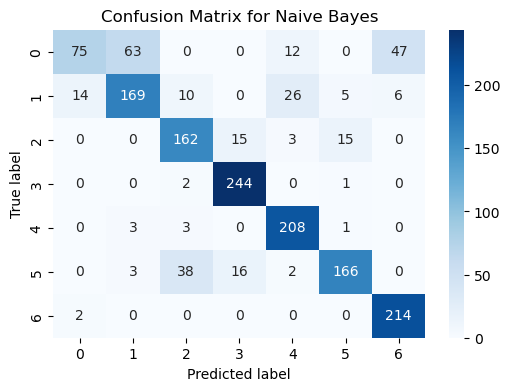

In [71]:
rf_acc=accuracy_score(y_test,y_pred_rf_test)
print("Random Forest Accuracy:",rf_acc)
print(classification_report(y_test,y_pred_rf_test))
rf_cm=confusion_matrix(y_test,y_pred_rf_test)
plot_confusion_matrix(rf_cm,"Confusion Matrix for Naive Bayes")


## Bagging

In [72]:
base_estimator = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
bagging.fit(X_train_best_features,y_train)
y_pred_bag=bagging.predict(X_test_best_features)

Bagging Accuracy: 0.8085245901639344
              precision    recall  f1-score   support

           1       0.79      0.41      0.54       197
           2       0.69      0.68      0.68       230
           3       0.75      0.83      0.79       195
           4       0.92      0.98      0.95       247
           5       0.82      0.96      0.89       215
           6       0.85      0.77      0.81       225
           7       0.80      0.99      0.89       216

    accuracy                           0.81      1525
   macro avg       0.80      0.80      0.79      1525
weighted avg       0.81      0.81      0.80      1525



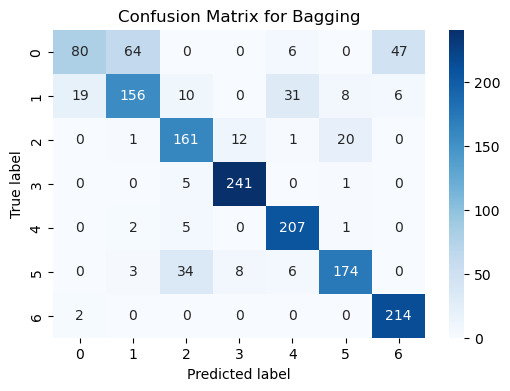

In [73]:
bag_acc=accuracy_score(y_test,y_pred_bag)
print("Bagging Accuracy:",bag_acc)
print(classification_report(y_test,y_pred_bag))
bag_cm=confusion_matrix(y_test,y_pred_bag)
plot_confusion_matrix(bag_cm,"Confusion Matrix for Bagging")


## Voting

Voting Classifier Accuracy: 0.77
              precision    recall  f1-score   support

           1       0.69      0.31      0.43       197
           2       0.65      0.62      0.64       230
           3       0.72      0.77      0.75       195
           4       0.89      0.96      0.93       247
           5       0.77      0.96      0.85       215
           6       0.83      0.72      0.77       225
           7       0.77      0.99      0.86       216

    accuracy                           0.77      1525
   macro avg       0.76      0.76      0.75      1525
weighted avg       0.76      0.77      0.75      1525



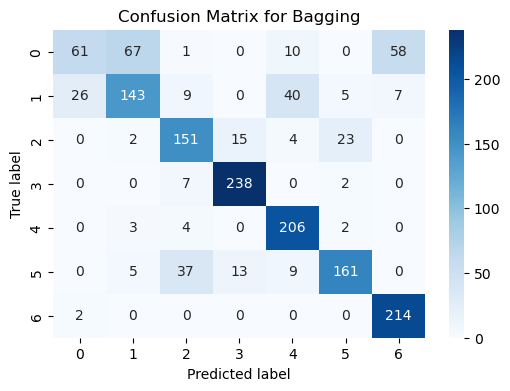

In [74]:
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('dt', dec_tree), ('knn', knn)],
    voting='soft')

voting_clf.fit(X_train_best_features, y_train)
y_pred_vot = voting_clf.predict(X_test_best_features)

acc_vot = accuracy_score(y_test, y_pred_vot)
print(f"Voting Classifier Accuracy: {acc_vot:.2f}")

print(classification_report(y_test,y_pred_vot))
vot_cm=confusion_matrix(y_test,y_pred_vot)
plot_confusion_matrix(vot_cm,"Confusion Matrix for Bagging")


# Gradient Boosting

Gradient Boosting: 0.7580327868852459
              precision    recall  f1-score   support

           1       0.74      0.35      0.47       197
           2       0.68      0.63      0.65       230
           3       0.67      0.75      0.71       195
           4       0.89      0.97      0.93       247
           5       0.72      0.94      0.82       215
           6       0.79      0.62      0.69       225
           7       0.79      0.99      0.88       216

    accuracy                           0.76      1525
   macro avg       0.75      0.75      0.74      1525
weighted avg       0.76      0.76      0.74      1525



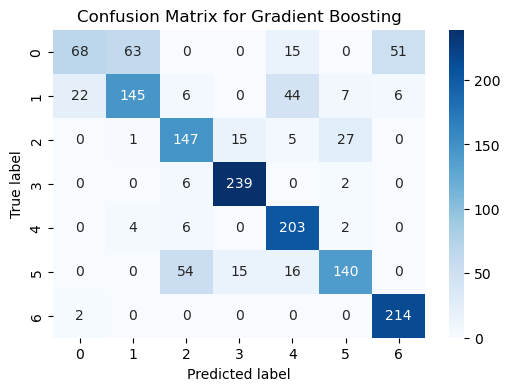

In [75]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_best_features, y_train)
y_pred_gb = gb.predict(X_test_best_features)

gb_acc=accuracy_score(y_test,y_pred_gb)
print("Gradient Boosting:",gb_acc)
print(classification_report(y_test,y_pred_gb))
gb_cm=confusion_matrix(y_test,y_pred_gb)
plot_confusion_matrix(gb_cm,"Confusion Matrix for Gradient Boosting")

# Plotting the results of ensemble models

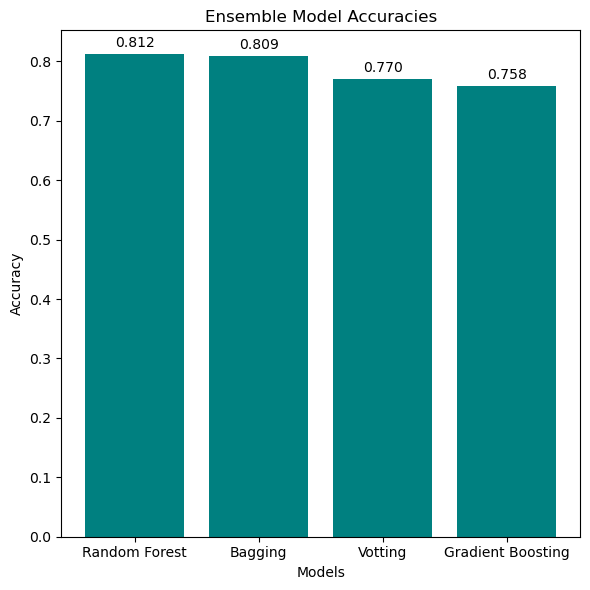

In [76]:
ensemble_accuracies = [rf_acc, bag_acc, acc_vot,gb_acc]
model_names_en = ["Random Forest",  "Bagging","Votting","Gradient Boosting"]

plt.figure(figsize=(6, 6))
bars = plt.bar(model_names_en, ensemble_accuracies, color='Teal')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Ensemble Model Accuracies")

def add_accuracies_labels():
    for bar, acc in zip(bars, ensemble_accuracies):
        height = bar.get_height()
        plt.annotate(f'{acc:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)
add_accuracies_labels()
plt.tight_layout()
plt.show()


# SOM

In [200]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_best_features)
X_test_scaled = scaler.fit_transform(X_test_best_features)
X_val_scaled = scaler.fit_transform(X_val_best_features)


rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

rf_predictions_train = rf_classifier.predict(X_train_scaled)
rf_predictions_test = rf_classifier.predict(X_test_scaled)
rf_predictions_val = rf_classifier.predict(X_val_scaled)


In [171]:
model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(8, activation='softmax'))
optimizer_adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_347 (Dense)           (None, 30)                90        
                                                                 
 dense_348 (Dense)           (None, 30)                930       
                                                                 
 dense_349 (Dense)           (None, 30)                930       
                                                                 
 dense_350 (Dense)           (None, 30)                930       
                                                                 
 dense_351 (Dense)           (None, 30)                930       
                                                                 
 dense_352 (Dense)           (None, 8)                 248       
                                                                 
Total params: 4,058
Trainable params: 4,058
Non-train

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 581.8895327703849
Epoch 1/10
1036/1036 [==============================] - 3s 2ms/step - loss: 0.4552 - accuracy: 0.8850
Epoch 2/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4674 - accuracy: 0.8814
Epoch 3/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4511 - accuracy: 0.8850
Epoch 4/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4501 - accuracy: 0.8849
Epoch 5/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4557 - accuracy: 0.8831
Epoch 6/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4493 - accuracy: 0.8844
Epoch 7/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4533 - accuracy: 0.8835
Epoch 8/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4484 - accuracy: 0.8847
Epoch 9/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.4470 - accuracy: 0.8851
Epoch

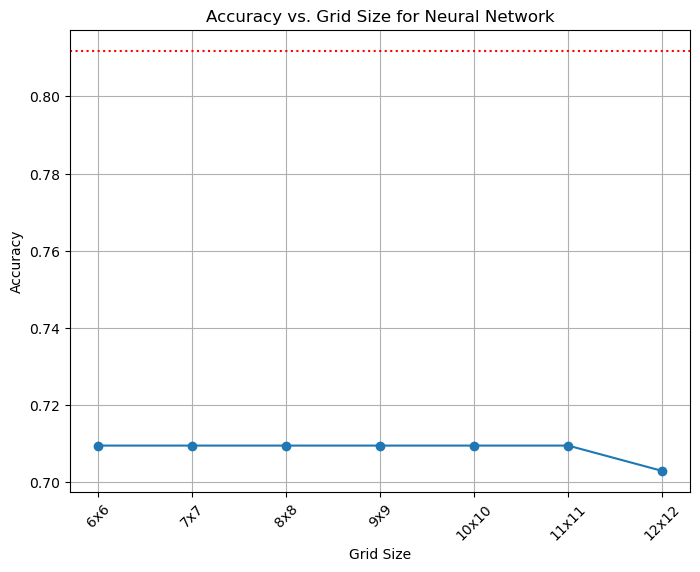

In [181]:
grids_structures = [(6,6),(7 ,7), (8,8),(9, 9),(10, 10),(11, 11),(12 ,12)]
# clusters_list = []
pki_accuracies = []  # List to store accuracies for each model

num_classes = len(np.unique(y_train))+1
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

for grid_size in grids_structures:                          
    som = MiniSom(grid_size[0], grid_size[1], X_train_best_features.shape[1], sigma=1.0, learning_rate=0.05)
    som.random_weights_init(X_train_best_features.values)
    num_iteration = 1000
    som.train_random(X_train_best_features.values,num_iteration , verbose = True )

    # Get cluster coordinates as (row, column) pairs
    clusters_train_coordinates = np.array([som.winner(x) for x in X_train_best_features.values])
    clusters_test_coordinates = np.array([som.winner(x) for x in X_test_best_features.values])
    
    # Convert (row, column) pairs into single indices
    clusters_train = np.ravel_multi_index(clusters_train_coordinates.T, grid_size)
    clusters_test = np.ravel_multi_index(clusters_test_coordinates.T, grid_size)
    
    X_neural_train = pd.DataFrame({'y_pred_rf_train': rf_predictions_train, 'clusters_train': clusters_train})
    X_neural_test = pd.DataFrame({'y_pred_rf_test': rf_predictions_test, 'clusters_test': clusters_test})
                                
                                
    model.fit(X_neural_train, y_train_encoded, epochs=10, batch_size=8)
    # Predict using the model on the test data
    predictions_neural = model.predict(X_neural_test)
    accuracy_test = tf.keras.metrics.CategoricalAccuracy()(y_test_encoded , predictions_neural )
#     _, accuracy_test = model.evaluate( y_test_encoded,predictions_neural)
    pki_accuracies.append(accuracy_test)
    print(accuracy_test)



# print(accuracies)

# Plotting the line plot
plt.figure(figsize=(6, 4))
plt.plot([f"{size[0]}x{size[1]}" for size in grids_structures], pki_accuracies, marker='o', linestyle='-')
plt.axhline(y=rf_acc, linestyle='dotted', color='red', label='Baseline Decision Tree')
plt.xlabel('Grid Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Grid Size for Neural Network')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





In [163]:
pki_accuracies

[<tf.Tensor: shape=(), dtype=float32, numpy=0.7095082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7095082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7095082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7095082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7095082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.3790164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7095082>]

# Hyperparameter Tuning

Training with neurons: 10, learning_rate: 0.01, hidden_layers: 1
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 357.21386154499504
Epoch 1/10
1036/1036 [==============================] - 3s 2ms/step - loss: 1.9929 - accuracy: 0.2161 - val_loss: 2.0281 - val_accuracy: 0.1642
Epoch 2/10
1036/1036 [==============================] - 2s 2ms/step - loss: 1.8442 - accuracy: 0.2195 - val_loss: 2.0221 - val_accuracy: 0.1742
Epoch 3/10
1036/1036 [==============================] - 2s 2ms/step - loss: 1.8393 - accuracy: 0.2209 - val_loss: 2.0185 - val_accuracy: 0.1649
Epoch 4/10
1036/1036 [==============================] - 2s 2ms/step - loss: 1.8332 - accuracy: 0.2196 - val_loss: 2.0324 - val_accuracy: 0.1649
Epoch 5/10
1036/1036 [==============================] - 3s 3ms/step - loss: 1.8299 - accuracy: 0.2357 - val_loss: 2.0276 - val_accuracy: 0.1348
Epoch 6/10
1036/1036 [==============================] - 3s 3ms/step - loss: 1.8192 - accuracy: 0.2246 - val_loss: 2.0281 - val_accuracy: 

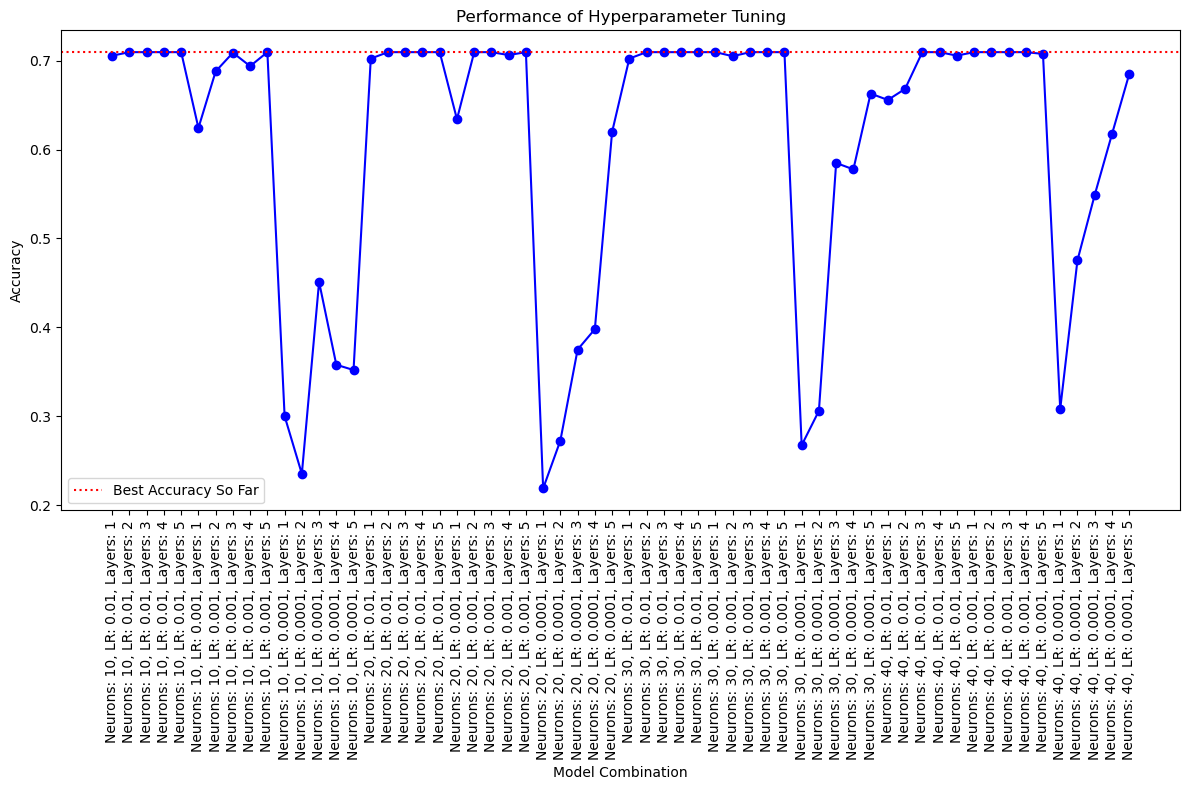

In [209]:
from keras.metrics import CategoricalAccuracy
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
def create_neural_network_model(neurons, hidden_layers):
    model = Sequential()
    # Input layer
    model.add(Dense(neurons, input_shape=(2,), activation='relu'))

    # Hidden layers
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation='relu'))

    # Output layer
    model.add(Dense(8, activation='softmax'))

    return model

# Lists to store the results
neurons_list = [10, 20, 30 , 40]  # Replace this with the list of neurons you want to try
learning_rate_list = [0.01, 0.001, 0.0001 ]  # Replace this with the list of learning rates you want to try
hidden_layers_list = [1, 2, 3, 4, 5]  # Replace this with the list of hidden layers you want to try
best_accuracy_so_far = 0.0
best_neurons = 0
best_learning_rate = 0.0
best_hidden_layers = 0

# Lists to store the results
test_acc_neural_new = []

# Loop over the hyperparameters
for neurons in neurons_list:
    for learning_rate in learning_rate_list:
        for hidden_layers in hidden_layers_list:
            print(f"Training with neurons: {neurons}, learning_rate: {learning_rate}, hidden_layers: {hidden_layers}")

            # Step 1: Initialize the SOFM
            som = MiniSom(11, 11, X_train_best_features.shape[1], sigma=1.0, learning_rate=learning_rate)

            # Step 2: Initialize Weights (Randomly in this case)
            som.random_weights_init(X_train_best_features.values)

            # Step 3: Train the SOFM
            num_iterations = 1000
            som.train_random(X_train_best_features.values, num_iterations, verbose=True)

            coordinates_train = np.array([som.winner(x) for x in X_train_best_features.values])
            clusters_train = np.ravel_multi_index(coordinates_train.T, (11, 11))

            coordinates_test = np.array([som.winner(x) for x in X_test_best_features.values])
            clusters_test = np.ravel_multi_index(coordinates_test.T, (11, 11))

            coordinates_validate = np.array([som.winner(x) for x in X_val_best_features.values])
            clusters_validate = np.ravel_multi_index(coordinates_validate.T, (11, 11))

            X_neural_train = pd.DataFrame({'y_pred_rf_train': rf_predictions_train, 'clusters_train': clusters_train})
            X_neural_test = pd.DataFrame({'y_pred_rf_test': rf_predictions_test, 'clusters_test': clusters_test})
            X_neural_validate = pd.DataFrame({'y_pred_rf_validate': rf_predictions_val, 'clusters_validation': clusters_validate})

            # Create and compile the neural network model
            model_1 = create_neural_network_model(neurons, hidden_layers)
            adam_optimizer = Adam(learning_rate=learning_rate)
            model_1.compile(optimizer= adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
            # Fit the data to the model
            model_1.fit(X_neural_train, y_train_encoded, epochs=10, batch_size=8, validation_data=(X_neural_validate, y_val_encoded))

            # Predict using the model on the test data
            predictions_neural = model_1.predict(X_neural_test)
        
    
            accuracy_test = CategoricalAccuracy()(y_test_encoded, predictions_neural)  
            test_acc_neural_new.append(accuracy_test)
            print(accuracy_test)
            if accuracy_test > best_accuracy_so_far:
                best_accuracy_so_far = accuracy_test
                best_neurons = neurons
                best_learning_rate = learning_rate
                best_hidden_layers = hidden_layers

# Plot the results

plt.figure(figsize=(12, 8))

combinations = [f"Neurons: {neurons_list[i]}, LR: {learning_rate_list[j]}, Layers: {hidden_layers_list[k]}"
                for i in range(len(neurons_list))
                for j in range(len(learning_rate_list))
                for k in range(len(hidden_layers_list))]

plt.plot(range(len(combinations)), test_acc_neural_new, 'b-o')
plt.axhline(y=best_accuracy_so_far, color='r', linestyle='dotted', label='Best Accuracy So Far')
plt.xlabel('Model Combination')
plt.ylabel('Accuracy')
plt.title('Performance of Hyperparameter Tuning')
plt.xticks(range(len(combinations)), combinations, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()